# G150 paper

##  2FHL  found unassociated 1.5 deg extended source. Jack noted that it is coincident with G150.3+4.5. Below is some work looking into the source

In [383]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.lines as mlines
from cycler import cycler
import sys
import os
import fnmatch
import yaml
import aplpy
import pyregion as pyr
import numpy as np
import pyJam.fermi.SNR_MC.coCube as cocube
from pyJam.fermi.SNR_MC.distNsep import *
from lande.utilities.tools import tolist #for saving yaml
import pyJam.kdistMaster as kd
from IPython.core.display import Image 
import astropy.io.fits as pf
from astropy.table import Table
from astropy.io import ascii
from astropy import units as u
from astropy import constants as c
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
#import pywcs
from astropy import wcs
import pandas as pd
#import photutils as pu #for making annular ring, easier with mpl? #doesn't work
from bokeh.models.glyphs import Annulus
#pd.options.display.mpl_style = 'default' ###there's a bug in pd 0.17.1 that makes this not work
#use this instead
mpl.style.use('ggplot')
from pyJam.utilities.sortNumStrings import atoi, natural_keys

%load_ext autoreload
%autoreload 2

home = os.environ['HOME']
desk = os.path.join(home,'Desktop')
#os.chdir(os.path.join(home,'Dropbox/CurrentWork/G150/'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 2FHL values (double check if these are the values in 2FHL or an early iteration of my analysis pipeline)

In [10]:

#use Dame et al. CO cube to make 
#add 3FGL source and circle for fit SNR at > 50 geV
b = 5.221292 #150.57 where did I get these from?
l = 150.3818
snrRad = 1.27
s = 10
#this is just the entire velocity range, I should add different vals for the different HI vels
coVmin = -319
coVmax = 319

# fitsMap    = 
#contsz     = 5,
# regFile    = None,
# contFits   = None,
# coords     = 'gal',
# fTitle     = '',
# contLevels = 9,
# smooth     = 1,

In [ ]:
#can I use aplpy for anything
#I know I can make slices at single vel, what else?
f = aplpy.FITSFigure(fitsFile) #f = aplpy.FITSFigure(fitsFile, figure = plt.figure(1),**kwargs)

In [12]:
### Modify this
lmin, lmax, bmin, bmax = cocube.getMapSize(l,b,s)
co = cocube.COline(COfile = '/Users/jmcohen/Desktop/cur/fitsFiles/COGAL_deep_mom_vlsr.fits') #change this to use different CO file
co.lvbSum(axis = 'all', pmin = [lmax,bmin,coVmin], pmax = [lmin,bmax,coVmax]) #I think this will just make the sliced cubes right?
# mapType = {'tsmap':'TS', 'cmap':'Counts: Data - Model','signifFT': '(Data - Model)/sqrt(Model)'}

# maps = ['',''] #add path to initial residual tsmap and cmap
# for m in mapType:
#             mName  = [self.snrName + '_nby_%s_zero.fits' %(m), self.snrName + '_nby_%s_zeroSNR.fits' %(m)]
#             for n in mName:
#     plotSlice(fitsFile = m, figTitle = fTitle, cbarTitle = mapType[m], cont = contFits, reg = regFile[0::2],  zoom = zoom , circ = circ, levels= contLevels, smooth = smooth, colors = ['k'], outText = '_vel' + self.vel) #one with labled in 50pc

0 (155.3818, 145.3818) 155.3818 145.3818 d (493, 81, 2881)
nmin/ nmax: 197.0 277.0
1 (0.22129200000000004, 10.221292) 0.221292 10.221292 d (493, 81, 2881)
nmin/ nmax: 42.0 81
2 (-319, 319) -319 319 d (493, 81, 2881)
nmin/ nmax: 1.0 492.0
nmin: {1: 197.0, 2: 42.0, 3: 1.0} nmax: {1: 277.0, 2: 81, 3: 492.0}
indiv 1.0 492.0 42.0 81 197.0 277.0
G150_COGAL_deep_mom_vlsr_sliced.fits already exists, delete and create it anew 
Save 3-D sliced Cube
G150_COGAL_deep_mom_vlsr_vb.fits already exists, delete and create it anew 
G150_COGAL_deep_mom_vlsr_lv.fits already exists, delete and create it anew 
G150_COGAL_deep_mom_vlsr_lb.fits already exists, delete and create it anew 


## Right now all values below are From fermiSymp15 poster. Are they all pointlike and not gtlike results? Poster says E > 5 GeV.

## Radio, CO, HI, and other propteries

In [179]:
#For Galactic rotation curve, only negative velocities are allowed (why?), so left out 2.9 km/s
HIvels = [-44.7, -35.9, -6.9]# left out 2.9] #Vlsr HI velocties[km/s], all with widths 5 km/s or less, so there is no evidence of line broadening from the SNR shock
lrad = 150.3
brad = 4.5
R0 = 8.3  # [kpc] distance to center of Galaxy
V0 = 239 # [km/s] LSR velocity 

## Remake the CO map from above since I fixed somethings in coCube
## HAVEN'T DONE THIS YET

In [ ]:
lmin, lmax, bmin, bmax = cocube.getMapSize(l,b,s)
co = cocube.COline(COfile = '/Users/jmcohen/Desktop/cur/fitsFiles/COGAL_deep_mom_vlsr.fits') #change this to use different CO file
co.lvbSum(axis = 'all', pmin = [lmax,bmin,coVmin], pmax = [lmin,bmax,coVmax]) #I think this will just make the sliced cubes right?

# GeV extended source properties

### From fermiSymp15 poster. All pointlike and not gtlike results?
### Poster says E > 5 GeV

In [55]:
R_gev = 1.46 #pointlike uniform disk fit radius [deg], +/- 0.03
index_gev = -1.88 # Power law index +/- 0.06
alpha_rad = -0.6  #Gao & Han 2014
jacksDists= [5.5,4,0.6]

# Estimate Distance from Galactic Rotation curve
## Looks like the two far distance are the same as Jack's, but not the one that corresponds to -6.9 km/s, not sure why

In [205]:
dist = np.vectorize(kd.kdist)
dnear = dist(l = lrad, b = brad, vin = HIvels, near = True,r0 = R0,v0=V0)
dfar = dnear = dist(l = lrad, b = brad, vin = HIvels, near = False,r0 = R0,v0=V0)
print 'HI velocites are %s' %HIvels
print 'Near distances %s' %dnear
print 'Far distances %s' %dfar

HI velocites are [-44.7, -35.9, -6.9]
Near distances [ 5.55560684  3.93866347  0.38365575]
Far distances [ 5.55560684  3.93866347  0.38365575]


## Physical size 
### My numbers are a little different than Jack's, I think mine are right, if I do it in astropy I get my results

In [197]:
size = np.vectorize(physSep)
sizes = size(t=R_gev*2, d=dnear) #t is for theta = angular radius, 2* for diameter/size
rads = sizes/2.
jsizes = size(t=R_gev*2, d=jacksDists) #t is for theta = angular radius, 2* for diameter/size
jrads = jsizes/2
print 'Physical size of sources in pc: %s' %sizes
print "Physical size of sources (using Jack's dists) in pc : %s" %jsizes

Physical radius of sources in pc: [ 283.13380341  200.72852533   19.55248362]
Physical radius of sources (using Jack's dists) in pc : [ 280.29987787  203.85445663   30.57816849]


# Sedov-Taylor phase stuff (see section 6 Truelove & McKee 1999)
Radius of the expanding shell (I think these 2 versions are equal?)
\begin{equation} R_{ST} = 0.26 (n_H/cm^{-3})^{-1/5}(t_{ST}/yr)^{2/5} (E_{ST}/4\times 10^{50} erg)^{1/5} pc = 0.31(E_{51}/n_0)^{1/5}t_{y}^{2/5} pc\end{equation}
In terms of t (this is missing a factor in front
\begin{equation}t_y = (n_0/E_{51})^{1/2}(R_{ST}/0.31)^{5/2}\end{equation} 
Velocity of expanding shell
\begin{equation}v_s = 1.23\times 10^5(E_{51}/n_0)^{1/5}t_{y}^{2/5} km s^{-1}\end{equation}
Temperature of expanding shell
\begin{equation}T_s = 2.09\times 10^{11} = (E^{51}/n_0)^{2/5}t^{-6/5} K\end{equation}

In [198]:
#make this allwork with astropy units?
def Rst(t,n0=1,E=1e51):
    """Sedov-Taylor phase SNR radius as 
       function of time. Is this Chevalier 1982 or Truelove & McKee 1999? I think the former? See Reynolds 2008
       
       n0 = ambient density [ cm^-3]
       t = SNR age [yr]
       E = SN explosion energy erg
       """
    return 0.314*t**(2/5.)*((E/1.e51)/n0)**(1/5.)

def Tst(R,n0=1, E=1e51):
    """Sedov-Taylor phase SNR age as
       function of
       
       n0 = ambient density [ cm^-3]
       R = Sedov-Taylor phase SNR radius [pc]. 
       E = SN explosion energy erg
    """
    return (n0/(E/1e51))**(1/2)*(R/(0.314))**(5/2.)


## Test Rst and Tst on data for W44

In [201]:
#This matches Uchiyama 2012 so long as the prefactor is 0.314, bit off if it's just 0.31
# r_w44 = Rst(t = 1e4, n0 = 2, E = 2e51)
# t_w44 = Tst(R = 12.5,n0 = 2, E=2e51)
# print 'Test W44: R = %s, T = %s' %(r_w44,t_w44)


Test W44: R = 12.5005651554, T = 9998.86977867


# Using physical sizes calucalted above, estimate age if in ST phase

In [203]:
T = np.vectorize(Tst)
R = np.vectorize(Rst)
T_g150 = T(R = rads,n0 = 1, E=1e51) #what should E and n0 be? 
jT_g150 = T(R = jrads,n0 = 1, E=1e51) #what should E and n0 be? 
print 'For n0 = 1 cm^-3, E_51 = 1\nWith physical radii %s\nAges in kyr:%s\n' %(rads,T_g150/1.e3)
print "Same but with Jack's distances, and physical radii %s\nAges in kyr: %s\n" %(jrads,jT_g150/1.e3)

For n0 = 1 cm^-3, E_51 = 1
With physical radii [ 141.5669017   100.36426267    9.77624181]
Ages in kyr:[ 4315.98769774  1826.51660903     5.40885972]

Same but with Jack's distances, and physical radii [ 140.14993894  101.92722832   15.28908425]
Ages in kyr: [ 4208.79877118  1898.45984902    16.5435826 ]



# Can I make assumptions about PWN/PSR asusming the GeV extended source is the PWN?

## Are the main arguments for it being an **old** PWN that it's large and the spectrum looks PWN-like? 

## Rpwn depends on Edot and M_ejecta. If I know typical M_ejecta I can estimae Edot. Eq'n 9 in Gaensler & Slane 2006 gives ... After estimating (guessing) Edot, how does Lgam / Edot compare to other

## Slane et al 2010, HESS J1640, Chevalier 1977, Gelfand et al 2009 (eqn B7). If t << tau then E ~ Edot
### Maybe this isn't so useful?
### it's before interaction with reverse shock of SNR

$\mathrm{R_{PWN} \sim 1.1 \dot{E}^{1/5}_{E_{0,38}} E^{3/10}_{51} M^{-1/2}_{10} t^{6/5}_3 pc}$ 

$\dot{E}_{E_{0,38}}$ is the initial spin down power, 

$M_{10}$ is the ejecta mass in units of 10 Msol

## van der Swallow 2001 gives radius after reverse shock has faded for times < and > char age of pulsar (see Gaensler & Slane 2006 too)

$R_{PWN} \propto t^{11/15}$ , $t < \tau_0$

$R_{PWN} \propto t^{3/10}$ , $t > \tau_0$
## also from this Slane paper, they estimate the current spin down power of the pulsar with the emprical relationship for Edot/Lx in Possenti 2002. Can we use the fact that we see no significant x-ray emission to put an uppper limit on x-ray flux --> xray lum (assuming distance) and an upper limit on Edot?

## Look into other large PWN, HESS J1825

## What does change in morphology between > 50 GeV and > 10 GeV suggest about nature of source?

## How does GeV extended source SED compare to population of LAT PWN? Luminosity plots ala Mattana et al, 2009, L vs diam^2 for LAT interacting SNRs?

## prelim SED for the GeV source don't look like either young or interacting SNRS

In [ ]:

#Evolution of PWN radius through SNR ejecta
#I think this is neglecting encounter with reverse shock of the SNR though?

Rpwn =  1.1 

## Assuming typical PSR velocity, about how far offset would it be given estimated age from above?
### Gaensler & Slane  2006: v_psr ~400-500 km/s, but I think some have extreme at 1000 km/s. Travels ballistically. was it this paper that they also give the time for the PSr to reach the forward shock of the SNR

## For 400 km/s and nearest dist:   sep = 2.2 pc , 0.3 deg
## For 1000 km/s and nearest dist: sep = 5.5 pc, 0.8 deg
## Where are the 3 3FGL sources wrt to this? I can also go the other way around and estimate the PSR velocity given it's offset from the center and assumed distance

In [218]:
#lets just look at the far distance
#psrVs = np.array([400.,500.,1000.])*u.km/u.s
psrVs = np.array([1.e3])*u.km/u.s
psrDs = psrVs*(T_g150*u.yr)
psrDs = psrDs.to(u.pc)
angD = np.vectorize(angSize)
print "Projected pulsar distances: %s" %psrDs.to(u.pc)
print "For ages %s kyr" %(T_g150/1e3)




Projected pulsar distances: [ 4414.0131227   1868.00075573     5.53170663] pc
For ages [ 4315.98769774  1826.51660903     5.40885972] kyr


In [220]:
psrSep_Dist = zip(psrDs.value,dnear)
for i in psrSep_Dist:
    print "PSR angular offset = %s deg for %s pc sep, dist = %s kpc" %(angSize(i[0],i[1]),i[0],i[1])
#d_ang = angD(psrDs,dnear)

PSR angular offset = 45.5223578501 deg for 4414.0131227 pc sep, dist = 5.55560684002 kpc
PSR angular offset = 27.1738269275 deg for 1868.00075573 pc sep, dist = 3.93866346894 kpc
PSR angular offset = 0.826114148527 deg for 5.53170663045 pc sep, dist = 0.38365575023 kpc


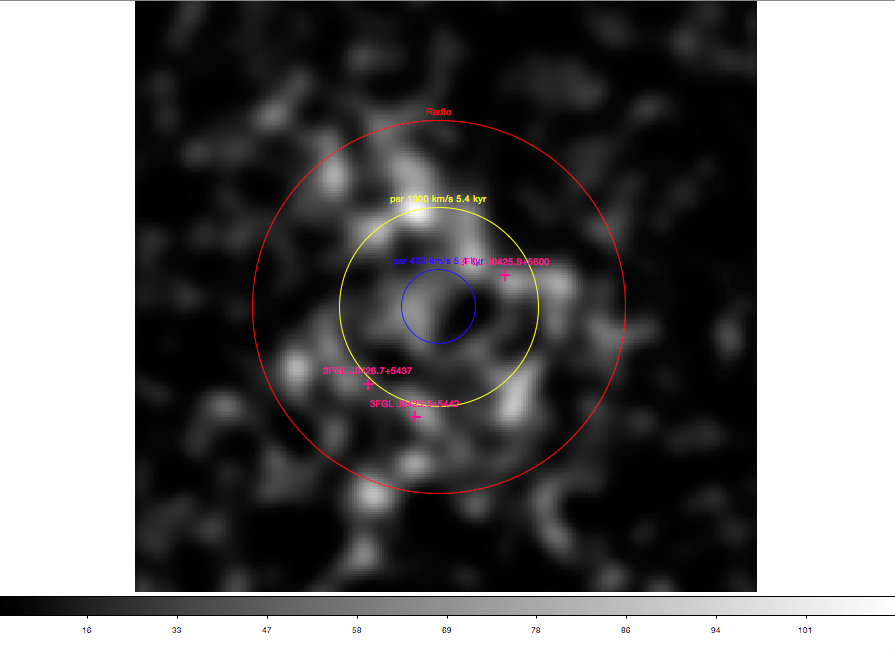

In [6]:
Image(filename= os.path.join(home,'Dropbox/CurrentWork/G150/G150_smoothResidCmap_PSRdists.png'), height = 800, width = 800)

# Anything to do with  van der swallow 2001 (see also HESS kookaburra paper, and some dejeager 2008 paper?) that says Rpwn/Rsnr ~0.25 (after reverse shock interaction?). If it is the PWN we're seeing then my age estimates are wrong, but I can estimate Rsnr and get age from that?

## Edot from LAT TeV PWN (idk if I need these)

In [10]:
tevPSR_Edot = np.asarray([4.5e+35, 4.6e+38, 1.7e+35, 3.2e+34, 6.9e+36, 2.6e+36, 1.1e+37, 8.4e+35, 2.3e+36, 1.7e+36, 3.1e+36, 4.9e+36, 1.0e+37, 9.1e+35, 1.7e+37, 1.6e+37, 3.0e+36, 4.0e+36, 2.1e+35, 3.4e+35, 3.4e+36, 1.3e+36, 2.2e+36, 1.8e+36, 6.8e+37, 2.3e+33, 2.8e+36, 1.1e+36, 3.4e+37, 5.5e+36, 5.9e+36, 8.1e+36, 9.8e+36, 4.6e+36, 2.8e+36, 2.9e+36, 1.2e+37, 3.4e+35, 1.6e+35, 3.4e+36, 2.2e+37])
tevPSRdist =  np.asarray([1.4, 2.0, 1.0, 0.2, 0.29, 2.9, 2.8, 2.3, 8.4, 6.7, 2.5, 1.6, 5.6, 4, 4.2, 7.8, 6.8, 3.0, 5.0, 4.8, 2.3, 3.6, 3.8, 3.5, 4.7, 7.8, 3.9, 4.0, 4.7, 6.6, 1.3, 5.1, 6, 7, 9.0, 3.2, 4.8, 9, 2.5, 10, 0.8])
tevPWNSigmaGauss = np.asarray([1.30, 0.18, 0.14, 0.05, 0.16, 0.20, 0.08, 0.06, 0.04, 0.17, 0.26, 0.15, 0.11, 0.23, 0.14, 0.07, 0.21, 0.11, 0.04, 0.35, 0.25, 0.30, 0.29, 0.15, 0.14, 0.16, 0.53, 0.04, 0.14, 0.13, 0.15, 0.09, 0.12, 0.41, 0.32, 0.11, 0.08, 0.34, 0.26, 0.55, 1.50, 0.10])

In [16]:
print 'Edot:: Mean: ', tevPSR_Edot.mean(), 'Max:',tevPSR_Edot.max(), 'Min: ',tevPSR_Edot.min()
print 'PSR dist:: Mean: ', tevPSRdist.mean(), 'Max: ',tevPSRdist.max(), 'Min :', tevPSRdist.min()
print 'PWN Sigma Gauss:: Mean: ', tevPWNSigmaGauss.mean(), 'Max: ',tevPWNSigmaGauss.max(), 'Min: ',tevPWNSigmaGauss.min()

Edot:: Mean:  1.79891292683e+37 Max: 4.6e+38 Min:  2.3e+33
PSR dist:: Mean:  4.3143902439 Max:  10.0 Min : 0.2
PWN Sigma Gauss:: Mean:  0.243095238095 Max:  1.5 Min:  0.04


# Yes SNR args:
* Spectrally, spatially similar to PKS 1209-51/52
    * Large diameter SNR towards outer Galaxy (can’t be too far away)
		* Low GeV/Radio surface brightness
		* Hard GeV spectral index (1.6? 1.8?)
* BIG DIFFERENCE: No prominent X-ray emission
* If Γ~1.6, then fits well with IC scenario (radio α = -0.6)
* If Γ~2, better fits with Brems, Pizero, or IC cutoff
    * => Need better GeV spectrum (>1 GeV)
* Good agreement between > 5gev disk fit and radio shell

# Info on the 3 3FGL sources

In [3]:
fglSources = ["3FGL J0425.8+5600","3FGL J0426.7+5437","3FGL J0423.5+5442"]
fglPath = os.path.join(home,"Dropbox/Catalogs/3FGL/gll_psc_v16.fit")
fgl3d = pf.getdata(fglPath)
poplist = []
fgl3dict = {x:fgl3d.field(x) for x in fgl3d.names}
for i in fgl3dict:
    fgl3dict[i] = list(fgl3dict.get(i))
#     if fgl3dict.get(i).ndim > 1:
#         poplist.append(i)

# for i in poplist:
#     fgl3dict.pop(i)
fgl3DF = pd.DataFrame(fgl3dict)
fgl3DF.set_index('Source_Name',inplace = True)
maxl = len(fgl3DF)
pd.set_option('display.max_columns', maxl)
pd.set_option('display.max_rows', maxl) #I will transpose the frame later


In [40]:
just3.PowerLaw_Index

Source_Name
3FGL J0425.8+5600    2.347609
3FGL J0426.7+5437    2.478879
3FGL J0423.5+5442    2.625293
Name: PowerLaw_Index, dtype: float64

In [4]:
just3 = fgl3DF.loc[fglSources]
just3_TS1_300 = just3.Sqrt_TS1000_3000**2 + just3.Sqrt_TS3000_10000**2 + just3.Sqrt_TS10000_100000**2 
print "TS summed over 1-100GeV bands %s\nAvg TS over all bands %s" %(just3_TS1_300,just3.Signif_Avg**2)

TS summed over 1-100GeV bands Source_Name
3FGL J0425.8+5600     25.542609
3FGL J0426.7+5437    137.203870
3FGL J0423.5+5442     14.265376
dtype: float64
Avg TS over all bands Source_Name
3FGL J0425.8+5600     40.145917
3FGL J0426.7+5437    201.473487
3FGL J0423.5+5442     19.748591
Name: Signif_Avg, dtype: float64


In [6]:
just3

,0FGL_Name,1FGL_Name,1FHL_Name,2FGL_Name,ASSOC1,ASSOC2,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,ASSOC_TEV,CLASS1,Conf_68_PosAng,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_95_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Cutoff,DEJ2000,Energy_Flux100,Exp_Index,Extended_Source_Name,Flags,Flux1000,Flux10000_100000,Flux1000_3000,Flux100_300,Flux3000_10000,Flux300_1000,Flux30_100,Flux_Density,Flux_History,Flux_Peak,GLAT,GLON,Peak_Interval,Pivot_Energy,PowerLaw_Index,RAJ2000,ROI_num,Signif_Avg,Signif_Curve,Signif_Peak,Spectral_Index,SpectrumType,Sqrt_TS10000_100000,Sqrt_TS1000_3000,Sqrt_TS100_300,Sqrt_TS3000_10000,Sqrt_TS300_1000,Sqrt_TS30_100,TEVCAT_FLAG,Time_Peak,Unc_Cutoff,Unc_Energy_Flux100,Unc_Exp_Index,Unc_Flux1000,Unc_Flux10000_100000,Unc_Flux1000_3000,Unc_Flux100_300,Unc_Flux3000_10000,Unc_Flux300_1000,Unc_Flux30_100,Unc_Flux_Density,Unc_Flux_History,Unc_Flux_Peak,Unc_Spectral_Index,Unc_beta,Variability_Index,beta,nuFnu10000_100000,nuFnu1000_3000,nuFnu100_300,nuFnu3000_10000,nuFnu300_1000,nuFnu30_100
Source_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3FGL J0425.8+5600,,,1FHL J0425.4+5601,,,,,,,,,-60.130001,0.038607,0.031946,-60.130001,0.0626,0.0518,-inf,56.014000,8.321129e-12,-inf,,4,6.605890e-10,4.340072e-11,3.138084e-10,2.078169e-08,6.243402e-11,2.975179e-09,NaN,1.985992e-13,"[2.10069e-08, 0.0, 4.20274e-09, 0.0, 1.62416e-...",-inf,4.750383,149.768005,-inf,1895.994263,2.347609,66.451599,121,6.336081,0.105451,-inf,2.347609,PowerLaw,4.136577,2.136711,3.544490,1.966166,3.415236,NaN,N,-inf,-inf,1.803004e-12,-inf,1.173928e-10,"[-1.7196e-11, 2.21295e-11]","[-1.52066e-10, 1.61211e-10]","[-5.90011e-09, 5.94908e-09]","[-3.55209e-11, 4.23566e-11]","[-8.91388e-10, 9.04291e-10]",NaN,3.517155e-14,"[[-1.38949e-08, 1.88575e-08], [nan, 1.64684e-0...",-inf,0.165640,-inf,51.673359,-inf,6.751109e-13,7.289679e-13,4.827527e-12,4.116718e-13,1.961747e-12,NaN
3FGL J0426.7+5437,,1FGL J0426.5+5437,,2FGL J0426.7+5434,,,,,,,,35.450001,0.043788,0.041691,35.450001,0.0710,0.0676,-inf,54.616798,2.128958e-11,-inf,,0,2.295638e-09,3.259613e-15,2.690153e-09,1.657099e-08,1.384689e-10,1.061097e-08,NaN,7.263759e-12,"[5.48841e-08, 1.87712e-08, 2.98574e-08, 3.1262...",-inf,3.873888,150.867020,-inf,852.094971,2.478879,66.681297,121,14.194136,7.685437,-inf,2.467036,LogParabola,0.000000,11.326524,3.159402,2.985587,7.313225,NaN,N,-inf,-inf,2.688777e-12,-inf,2.180972e-10,"[nan, 1.59648e-11]","[-2.7555e-10, 2.85162e-10]","[-5.1779e-09, 5.39212e-09]","[-5.28429e-11, 5.96814e-11]","[-1.53674e-09, 1.53674e-09]",NaN,5.895361e-13,"[[-1.5109e-08, 1.62485e-08], [-1.31111e-08, 1....",-inf,0.119907,0.126830,51.832188,0.561026,3.020115e-17,5.752318e-12,4.538752e-12,7.438427e-13,7.309950e-12,NaN
3FGL J0423.5+5442,,,,,,,,,,,,80.150002,0.092447,0.068888,80.150002,0.1499,0.1117,-inf,54.705799,1.293986e-11,-inf,,0,7.461712e-10,1.527913e-11,2.587464e-10,2.164329e-08,1.490207e-10,5.135374e-09,NaN,1.069312e-12,"[0.0, 3.08672e-08, 0.0, 0.0, 5.42339e-08, 2.62...",-inf,3.612116,150.486969,-inf,1049.148315,2.625293,65.899597,121,4.443939,0.935096,-inf,2.625293,PowerLaw,1.152993,1.197572,2.345848,3.391431,3.097338,NaN,N,-inf,-inf,3.064332e-12,-inf,1.617157e-10,"[-1.36454e-11, 1.87304e-11]","[-2.17509e-10, 2.26957e-10]","[-9.24804e-09, 9.27347e-09]","[-5.14642e-11, 5.78599e-11]","[-1.65906e-09, 1.70818e-09]",NaN,2.129744e-13,"[[nan, 3.62721e-08], [nan, 3.00776e-08], [nan,...",-inf,0.151782,-inf,61.846989,-inf,2.159248e-13,5.854846e-13,4.897386e-12,9.524551e-13,3.282238e-12,NaN


# Multiwavelength info on the 3 3FGL sources (but just on the entire region interior to G150)
## Swift XRT follow up of 1FGL sources (just 1FGL?)
### http://arxiv.org/pdf/1305.4949v1.pdf
### http://www.swift.psu.edu/unassociated/source.php?source=1FGLJ0426.5+5437
### http://www.swift.psu.edu/unassociated/source.php?source=1FGLJ0427.9+5556
## Fermi refined associations
### http://arxiv.org/pdf/1503.05556v1.pdf
###  https://iopscience.iop.org/0067-0049/217/1/2/suppdata/apjs507551t4_mrt.txt

In [39]:
refAssoc  = ascii.read('https://iopscience.iop.org/0067-0049/217/1/2/suppdata/apjs507551t4_mrt.txt')
refAssocDF = refAssoc.to_pandas()

In [94]:
#refAssocDF

In [86]:
#get the rows for the 2FGL sources 
#there's only 2, one of the 3FGL has no 2FGL/1FGL counterpart, 3FGL J0423.5+5442
fgl2 = ['2FGL J0426.7+5434','2FGL J0423.4+5612']
fgl1 = ['1FGL J0427.9+5556'] 
fglAssoc = refAssocDF.loc[(refAssocDF.Name2.isin(fgl2)) | (refAssocDF.Name1.isin(fgl1))]
fglAssoc

,Name1,Name2,Name3,gclass,Ctp1,n_Ctp1,z,f_z,inside,include,...,Ctp2RAm,Ctp2RAs,Ctp2DE-,Ctp2DEd,Ctp2DEm,Ctp2DEs,Ctp2B2mag1,Ctp2R2mag1,ProbBZB,ProbBZQ
233,1FGL J0426.5+5437,2FGL J0426.7+5434,NaN,C,NVSS J042651+543612,"N,M,U",NaN,NaN,NaN,NaN,...,25,50.7,+,54,38,51.5,NaN,NaN,NaN,NaN
236,1FGL J0427.9+5556,NaN,NaN,C,1RXS J042738.8+555831,"U,X",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1539,NaN,2FGL J0423.4+5612,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
fglAssoc.loc[233]

Name1             1FGL J0426.5+5437
Name2             2FGL J0426.7+5434
Name3                           NaN
gclass                            C
Ctp1            NVSS J042651+543612
n_Ctp1                        N,M,U
z                               NaN
f_z                             NaN
inside                          NaN
include                         NaN
classCtp1                       unc
Ctp1RAh                           4
Ctp1RAm                          26
Ctp1RAs                       51.74
Ctp1DE-                           +
Ctp1DEd                          54
Ctp1DEm                          36
Ctp1DEs                       12.31
Ctp1B2mag1                    19.91
Ctp1R2mag1                    17.46
Ctp2          1RXS J042550.7+543851
n_Ctp2                            X
classCtp2                       unc
Ctp2RAh                           4
Ctp2RAm                          25
Ctp2RAs                        50.7
Ctp2DE-                           +
Ctp2DEd                     

# RASS smoothed counts ( I think) map of the region around G150
# Closest blob is 0.67 deg away from center, further from the center of the 2FHL source

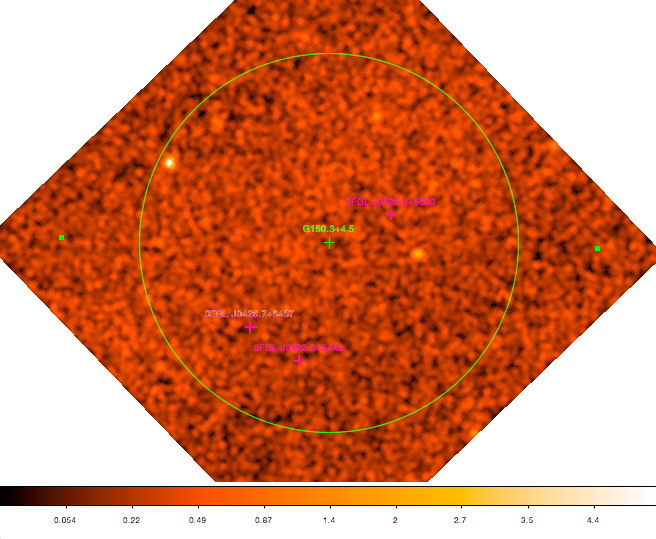

In [289]:
Image(filename='/Users/elunejava/Dropbox/CurrentWork/G150/G150_1deg_RASS.png')

# How to determine which energy range to use for G150 morphology study?
## - Compare Npred for the ES w/ diffuse at all the energy ranges
### I don't know if this is really the right metric

In [541]:
# read in all yaml files to pull out Npred
###This doesn't work, just gets Edisk (vs Disk) since energy is key
g150Dir = os.path.join('/Users/elunejava/Desktop/G150.3+4.5/freeExtension/keepPSRlike/corCenter/G150.3+4.5')
os.chdir(g150Dir)

#g150yaml = {[p for p in os.path.abspath(dirpath).split('/') if p.endswith('gev')][0]:os.path.join(dirpath, f) for dirpath, dirnames, files in os.walk(g150Dir) for f in fnmatch.filter(files, 'results_G150.3+4.5.yaml' %locals())} #this 

In [3]:
Disk = True # just get Disk results, else get Disk and Edisk
if Disk:
    g150yamls = {[p for p in os.path.abspath(dirpath).split('/') if p.endswith('gev')][0]:os.path.join(dirpath, f) for dirpath, dirnames, files in os.walk(g150Dir) if not 'EllipticalDisk' in dirpath for f in fnmatch.filter(files, 'results_G150.3+4.5.yaml' %locals())}
elif Disk = False:
    g150yamls = {[p for p in os.path.abspath(dirpath).split('/') if p.endswith('gev')][0]:os.path.join(dirpath, f) for dirpath, dirnames, files in os.walk(g150Dir) if 'EllipticalDisk' in dirpath for f in fnmatch.filter(files, 'results_G150.3+4.5.yaml' %locals())}
    #g150dats = {[p for p in os.path.abspath(dirpath).split('/') if p.endswith('gev')][0]os.path.join(dirpath, f) for dirpath, dirnames, files in os.walk(g150Dir) for f in fnmatch.filter(files, 'G150.3+4.5*.dat' %locals())}
#sbpls = [os.path.dirname(i) for i in g150dats if 'SBPL' in i]
#for i in sbpls:
#    g150dats.remove(os.path.join(i,'G150.3+4.5.dat'))

In [11]:
#make a pandas dataPanel with all the yaml

if 'resPan' in locals():
    del resPan
if os.path.exists('g150resPan.dat'):
    print 'g150 panel already exists, load pickled file'
    resPan = pd.io.pickle.read_pickle('g150resPan.dat')
else:
    for reg, yam in g150yamls.items():
        resYaml = yaml.load(open(yam))
        for i,j in resYaml.items(): #
            if type(j) is list:
                idx = ['it'+str(x) for x,_ in enumerate(j)]
                resYaml[i] = pd.Series(j,name = i,index = idx)
        df = pd.DataFrame(resYaml)
        if not 'resPan' in locals():
            resPan = pd.Panel.from_dict({reg: df})
        else:
            resPan = pd.concat([resPan,pd.Panel.from_dict({reg: df})])

    resPan.to_pickle('g150resPan.dat') #save the panel in case I want to use it again.
    

g150 panel already exists, load pickled file


In [14]:
maxl = max([len(resPan.items),len(resPan.major_axis),len(resPan.minor_axis)])
pd.set_option('display.max_columns', maxl)
pd.set_option('display.max_rows', maxl) #I will transpose the frame later
#print maxl

31


In [19]:
#print resPan.describe, '\n'
print resPan.items, '\n'
#print resPan.minor_axis, '\n'
#resPan[i].T.loc['Galactic Diffuse (template_4years_P8_V2_scaled.fits)']

Index([u'1gevTo563gev', u'56p2gevTo563gev', u'1p8gevTo563gev',
       u'3p2gevTo563gev', u'749mevTo563gev', u'10gevTo563gev',
       u'5p6gevTo563gev'],
      dtype='object') 



In [600]:
#best to work with resPan or make a single DF with all the data?
g150CtsD = []#{}
diffCtsD = []#{}
ratD = []#{}
ratD_diffNorm = []#{}
sigD = []#{}
sigDErr = []
TSDpsr = []
TSD0425 = []
TSD0423 = []
indexD = []
fluxD = []
efluxD = []
indexDErr = []
fluxDErr = []
efluxDErr = []
lD = []
lerrD = []
bD = []
berrD = []
eRange = []
for i in sorted(resPan,key = natural_keys):
    eRange.append(i)
    g150Cts = resPan[i].T.loc['G150.3+4.5']['ModCts']
    #g150CtsD[i] = g150Cts
    g150CtsD.append(g150Cts)
    diffCts = resPan[i].T.loc['Galactic Diffuse (template_4years_P8_V2_scaled.fits)']['ModCts'][-1]
    #diffCtsD[i] = diffCts
    diffCtsD.append(diffCts)
    sig = resPan[i].T.loc['G150.3+4.5']['Sigma'][0]
    #sigD[i] = sig
    sigD.append(sig)
    sigErr = resPan[i].T.loc['G150.3+4.5']['SigmaError'][0]
    #sigD[i] = sig
    sigDErr.append(sigErr)
    #ratD[i]= g150Cts/diffCts
    ratD.append(diffCts/g150Cts)
    ratD_diffNorm.append(diffCts*sig**2/10.**2/g150Cts)#does it cts in 10 deg / (10deg/sigma deg)
    TS = resPan[i].T.loc['G150.3+4.5']['TS']
    TSD.append(TS)
    index = resPan[i].T.loc['G150.3+4.5']['Index'][0]
    indexD.append(index)
    flux = resPan[i].T.loc['G150.3+4.5']['Flux']
    fluxD.append(flux)
    eflux = resPan[i].T.loc['G150.3+4.5']['eFlux']
    efluxD.append(eflux)
    #
    indexErr = resPan[i].T.loc['G150.3+4.5']['IndexError'][0]
    indexDErr.append(indexErr)
    fluxErr = resPan[i].T.loc['G150.3+4.5']['FluxError']
    fluxDErr.append(fluxErr)
    efluxErr = resPan[i].T.loc['G150.3+4.5']['eFluxError']
    efluxDErr.append(efluxErr)
    
    #
    l  = resPan[i].T.loc['G150.3+4.5']['l']
    lD.append(l)
    lerr = resPan[i].T.loc['G150.3+4.5']['RAError'][0]
    lerrD.append(l)
    b  = resPan[i].T.loc['G150.3+4.5']['b']
    bD.append(b)
    berr = resPan[i].T.loc['G150.3+4.5']['DECError'][0]
    berrD.append(b)
    
    #J0426
    TSpsr = resPan[i].T.loc['3FGL J0426.7+5437']['TS']
    TSDpsr.append(TSpsr)
    #3FGL J0425.8+5600
    TS0425 = resPan[i].T.loc['3FGL J0425.8+5600']['TS']
    TSD0425.append(TS0425)
    #3FGL J0423.5+5442
    TS0423 = resPan[i].T.loc['3FGL J0423.5+5442']['TS']
    TSD0423.append(TS0423)
crds = SkyCoord(l= lD, b = bD, frame = 'galactic', unit=(u.degree, u.degree)) #preserves order in sorted(snrSuperData)
eRange = ['> '+e.replace('gevTo563gev','').replace('p','.').replace('mevTo563gev','').replace('749','0.75') + ' GeV' for e in eRange]
TSpsr_0 = [x[-1] if isinstance(x,list) else 0 for x in TSDpsr]
TS0425_0 = np.nan_to_num(TSD0425)
TS0423_0 = np.nan_to_num(TSD0423)
#TS0425_0 = [x[-1] if isinstance(x,list) else 0 for x in TSD0425]
x = [1,1.8,3.2,5.6,10,56,0.749]
fhl2Ind = 1.66
fhl2IndErr = 0.2
fhl2Sig = 1.28
fhl2SigErr = 0.04

### i should add the 2FHL values to all the below plots

[1.4765882648220847, 1.4789541736316847, 1.4958916791943884, 1.4743515578065605, 1.51700137783682, 1.448719350003091, 1.5392400059034614]


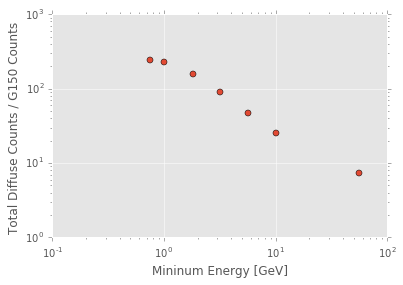

In [22]:
#plot
plt.loglog(x,ratD,'o')
plt.xlabel('Mininum Energy [GeV]')
plt.ylabel('Total Diffuse Counts / G150 Counts ')

print sigD

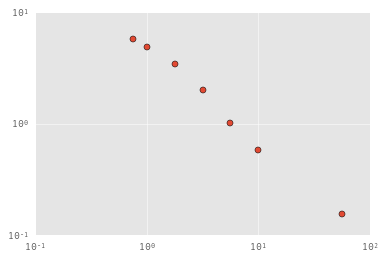

In [205]:
# I don't just want the total diffuse counts though, I want the total im a region the size of G150?
# This doesn't do anything though, just scales
#maybe what I really want is energy flux/ surface brightness at each energy?
plt.loglog(x,ratD_diffNorm,'o') #this doesn't really do anything but scale 

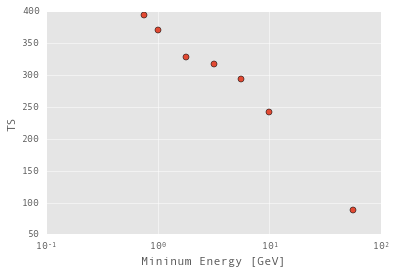

In [214]:
plt.semilogx(x,TSD,'o')
plt.xlabel('Mininum Energy [GeV]')
plt.ylabel('TS')

### J0426 gets removed from initial RoI for 5.6,10, 56 GeV because the TS to start is too low.
### see below

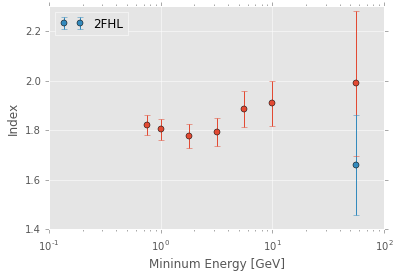

In [597]:
plt.errorbar(x,indexD,yerr=indexDErr,fmt = 'o') #this doesn't really do anything but scale 
plt.semilogx()
plt.xlabel('Mininum Energy [GeV]')
plt.ylabel('Index')
plt.errorbar(56,fhl2Ind,yerr=fhl2IndexErr,fmt = 'o',label = '2FHL') #this doesn't really do anything but scale 
plt.legend(loc= 'best')

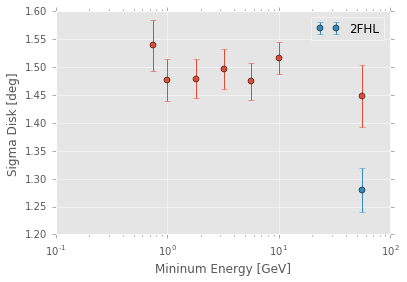

In [601]:
plt.errorbar(x,sigD,yerr=sigDErr,fmt = 'o') #this doesn't really do anything but scale 
plt.semilogx()
plt.xlabel('Mininum Energy [GeV]')
plt.ylabel('Sigma Disk [deg]')
plt.errorbar(56,fhl2Sig,yerr=fhl2SigErr,fmt = 'o',label = '2FHL') #this doesn't really do anything but scale 
plt.legend(loc= 'best')


# Next two are not SED! They're the flux from each run integrated from Min energy to 563 GeV
## are the units wrong? is it per sr too?

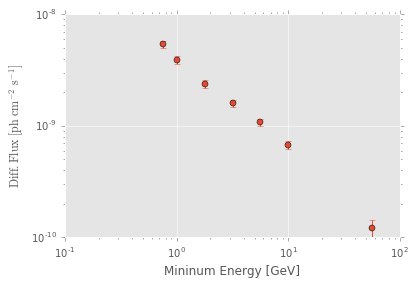

In [287]:
plt.errorbar(x,fluxD,yerr=fluxDErr,fmt = 'o')
plt.loglog()
plt.xlabel('Mininum Energy [GeV]')
plt.ylabel(r'$\mathrm{  Flux \/ \/ [ph \/\/ cm^{-2} \/\/ s^{-1}]}$')

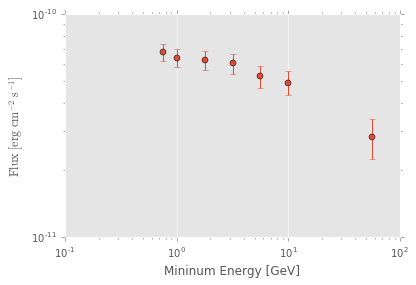

In [185]:
plt.errorbar(x,efluxD,yerr=efluxDErr,fmt = 'o') #this doesn't really do anything but scale 
plt.loglog()
plt.xlabel('Mininum Energy [GeV]')
#plt.ylabel('Flux [erg '+r'$\mathrm{\bf{cm^{-2} s^{-1}]}}$') #check this, is it erg? 
#plt.ylabel('Flux [erg cm^-2 s^-1]') #check this, is it erg? 
plt.ylabel(r'$\mathrm{ Int. Flux \/ \/ [erg \/\/ cm^{-2} \/\/ s^{-1}]}$')

# Show TS for J0426 at each iteration it's in the model
## it's removed from the RoI before adding G150 if  TS < 9, hence it missing from the higer energy bins

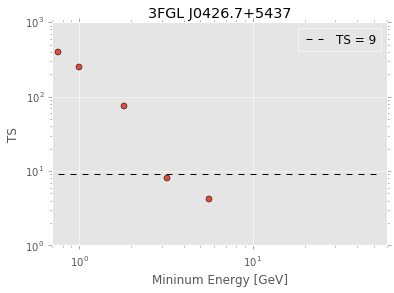

In [302]:
plt.loglog(x,TSpsr_0,'o')
plt.xlabel('Mininum Energy [GeV]')
plt.ylabel('TS')
plt.title('3FGL J0426.7+5437')
plt.xlim(.700,60)
plt.hlines(9,x[-1],x[-2],linestyles ='--',label = 'TS = 9')
plt.legend()

# These two 3FGL sources are removed from the RoI before adding G150
# Below are the TS from an initial fit after just loading in 3FGL

<function matplotlib.pyplot.legend>

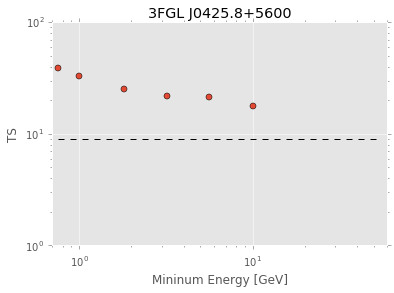

In [306]:
plt.loglog(x,TS0425_0,'o')
plt.xlabel('Mininum Energy [GeV]')
plt.ylabel('TS')
plt.title('3FGL J0425.8+5600')
plt.xlim(.700,60)
plt.hlines(9,x[-1],x[-2],linestyles ='--',label = 'TS = 9')
plt.legend

<function matplotlib.pyplot.legend>

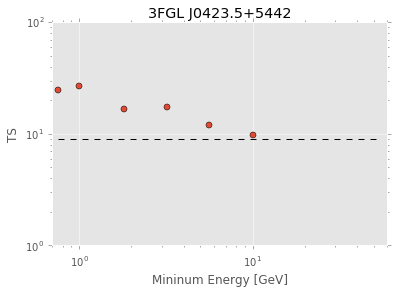

In [310]:
plt.loglog(x,TS0423_0,'o')
plt.xlabel('Mininum Energy [GeV]')
plt.ylabel('TS')
plt.title('3FGL J0423.5+5442')
plt.xlim(.700,60)
plt.hlines(9,x[-1],x[-2],linestyles ='--',label = 'TS = 9')
plt.legend

# Maybe I want to compare something like surface brightness of the objects?
## how do I get the diffuse flux from pointlike?
### b.smodel.i_flux(roi.fit_emin[0],roi.fit_emax[0]) b = roi.dsm.diffuse_sources[0]
### b.smodel.i_flux(roi.fit_emin[0],roi.fit_emax[0]) 
### I think the units are ph/cm^2/s/sr between emin-emax
### times 4 pi for the whole sky
### 2*np.pi*(1-np.cos(np.radians(radius)))) for not whole sky
### roi.dsm.diffuse_sources[0].smodel.i_flux(roi.bin_edges[0],roi.bin_edges[1],e_weight = 1, error = True, cgs = True)[0]*(2*np.pi*(1-np.cos(np.radians(1.4))))
### still seems large to me for 1-1.8 bin: 3.6e3 ph/cm^2/s in a region the size of G150 at this energy
### huge if I integrate from 1-563 GeV: 5.14e+02 ph/cm^2/s, is this not right?
### might need to mess with weight and not cgs

## For morph from LAT SNR papers
### W51c paper used 2 GeV Front events, something about avg surface brightness being 2-5 times higher for 0.5-2 GeV and 2-10 GeV respectively
### W44 same as W51c



# Lowest energy such that the extension + errs are reasonable to choose energy range?

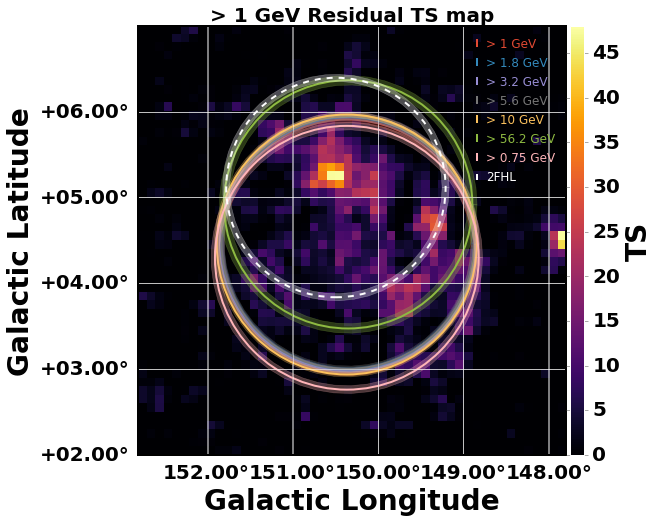

In [543]:
#mapPath = os.path.join(g150Dir,'1gevTo563gev/Disk/G150.3+4.5_cmap.fits')
mapPath = os.path.join(g150Dir,'1gevTo563gev/Disk/Initial_fit_aftDelTSlt9_G150.3+4.5_tsmap.fits')
head = pf.getheader(mapPath)
g150_wcs = wcs.WCS(head)
binsz = head.get('CDELT2') #good for tsmaps, use b pixel size
ncolors = plt.rcParams['axes.prop_cycle'] #get colors from default color cycle
maps = 'Counts Maps'
maps = 'TS'
fig = plt.figure(figsize=[8,8])
f = aplpy.FITSFigure(mapPath,figure = fig,)
if maps == 'Counts Maps':
    f.show_colorscale(vmin = 0,pmax = 100,cmap = 'inferno', smooth = None) #do I need to playt with the pmin/max? values?
    cbarTitle = 'Counts'
else:
    f.show_colorscale(vmin = 0, vmax = 48,cmap = 'inferno', smooth = None,stretch = 'linear') #do I need to playt with the pmin/max? values?
    cbarTitle = 'TS'
#f.set_tick_color('white')
f.show_grid()
f.hide_grid()
#f.add_label(x = 150.4,y=3.3,text = 'G150.3+4.5',family = 'Helvetica', relative =False, weight = 2, size =28, color = 'cyan')
f.add_label
f.set_system_latex(usetex = False)
# f.set_tick_labels_style('latex')
# f.set_labels_latex(True)
f.tick_labels.set_xformat('ddd.dd')
f.tick_labels.set_yformat('ddd.dd')
ax = plt.gca()
ax.xaxis.label.set_color('k')
ax.yaxis.label.set_color('k')
[i.set_color("k") for i in plt.gca().get_xticklabels()]
[i.set_color("k") for i in plt.gca().get_yticklabels()]
cbar = plt.colorbar
f.frame.set_color('black')
f.frame.set_linewidth(2)
f.add_colorbar()
f.axis_labels.set_font(size='28',weight='bold')
f.tick_labels.set_font(size ='20',weight = 'bold')
f.colorbar.set_axis_label_text(cbarTitle)
###
c = f.image.colorbar
c.ax.yaxis.label.set_color('k')
[i.set_color("k") for i in c.ax.get_yticklabels()]
f.colorbar.set_font(size='20',weight = 'bold')
f.colorbar.set_axis_label_font(size='28',weight='bold')
f.recenter(150.3, 4.5, 2.5) #this is just for kookaburra for now
for ind,s in enumerate(sigD):
    ##get wcs pixel coords
    ringCrdPix = g150_wcs.wcs_world2pix([[lD[ind],bD[ind]]], 0).ravel()
    #print lD[ind],bD[ind]
    crdsFromPix = np.asarray([ringCrdPix])
    #np.array([[lpix, bpix]], np.float_)
    crds= g150_wcs.wcs_pix2world(crdsFromPix, 0).ravel()
    #print crds
    #print ringCrdPix
    ##try with bokek
    #glyph = Annulus(x=150.3, y=4.5, inner_radius=.2, outer_radius=.4, fill_color="#7fc97f")
    
    ##try with photutils
    ##did this not work because the radius needs to be pixel coords also?
    pixelMinR =  (sigD[ind] - sigDErr[ind])/ binsz
    pixelMaxR = (sigD[ind] + sigDErr[ind]) / binsz
    #lPix = lD[ind] * binsz # There are nothing?
    #bPix = bD[ind] * binsz # There are nothing?
    lerrPix = lerrD[ind] * binsz # are these really what I want?
    berrPix = berrD[ind] * binsz # are these really what I want?
    ring = pu.CircularAnnulus(tuple(ringCrdPix),pixelMinR ,pixelMaxR)
    circ = pu.CircularAperture(tuple(ringCrdPix),sigD[ind]/binsz)
    #ring = pu.CircularAnnulus((150.3,4.5),sigD[ind] - sigDErr[ind] ,sigD[ind] + sigDErr[ind])
    ##ring.plot(ax = ax,fill = True,alpha = 0.3,color = list(ncolors)[ind]['color'])
    #f.show_circles(lD[ind], bD[ind],sigD[ind], edgecolor = list(ncolors)[ind]['color'], lw = 2,linestyle = '-')
    circ.plot(ax = ax,color = list(ncolors)[ind]['color'],lw = 2,label = eRange[ind])
    #are the errorbars too small?
    #ax.plot(ringCrdPix[0],ringCrdPix[1],'x',color = list(ncolors)[ind]['color'],ms = 10)
    ##ax.errorbar(ringCrdPix[0],ringCrdPix[1],xerr=lerrPix,yerr=berrPix,ecolor = list(ncolors)[ind]['color'],ms = 4)
    #plt.show()
    ##break
    #try with mpl
    
    ###I need to think about why this isn't working
    ###something to do  with xs/ys having negative values
    ###it's not mapping to the right values, I need to use fractional radius and not just total
    n, radii = 50, [pixelMinR, pixelMaxR]
    theta = np.linspace(0, 2*np.pi, n, endpoint=True)
    xs = np.outer(radii, np.cos(theta))+ ringCrdPix[0]
    ys = np.outer(radii, np.sin(theta))+ ringCrdPix[1]
    xs[1,:] = xs[1,::-1]
    ys[1,:] = ys[1,::-1]
    ax.fill(np.ravel(xs), np.ravel(ys), edgecolor= list(ncolors)[ind]['color'], alpha = 0.3)
#add 2FHL circle
#this is from my galInd fix run I think
l2FHL =  150.390055 #150.384
b2FHL =  5.2196 #5.21
l2FHLerr = 0.0510 #RA error
b2FHLerr = 0.07334 # DEC error
s2FHL = 1.28068 #1.28068 #paper says 1.27
sErr2FHL = 0.0411
CrdPix2FHL = g150_wcs.wcs_world2pix([[l2FHL,b2FHL]], 0).ravel()
circ = pu.CircularAperture(tuple(CrdPix2FHL),s2FHL/binsz)
circ.plot(ax = ax,color = 'white',lw = 2,ls = '--',label = '2FHL')

pixelMinR =  (s2FHL - sErr2FHL)/ binsz
pixelMaxR = (s2FHL + sErr2FHL) / binsz
n, radii = 50, [pixelMinR, pixelMaxR]
theta = np.linspace(0, 2*np.pi, n, endpoint=True)
xs = np.outer(radii, np.cos(theta))+ CrdPix2FHL[0]
ys = np.outer(radii, np.sin(theta))+ CrdPix2FHL[1]
xs[1,:] = xs[1,::-1]
ys[1,:] = ys[1,::-1]
ax.fill(np.ravel(xs), np.ravel(ys), edgecolor= 'white',fc = 'w', alpha = 0.3)

f.set_title('E > 1 GeV Residual TS map',size='20',weight = 'bold')
leg = ax.legend(fancybox=True, framealpha=0,handlelength=0)
for ind, text in enumerate(leg.get_texts()):
    if '2FHL' in text.__str__(): #better way to get the string out?
        plt.setp(text, color = 'white')
    else:
        plt.setp(text, color = list(ncolors)[ind]['color'])

f.save('/Users/elunejava/Desktop/testG150.png',dpi=300)

#still need to add postion crosses w/errorbars to show centroid 

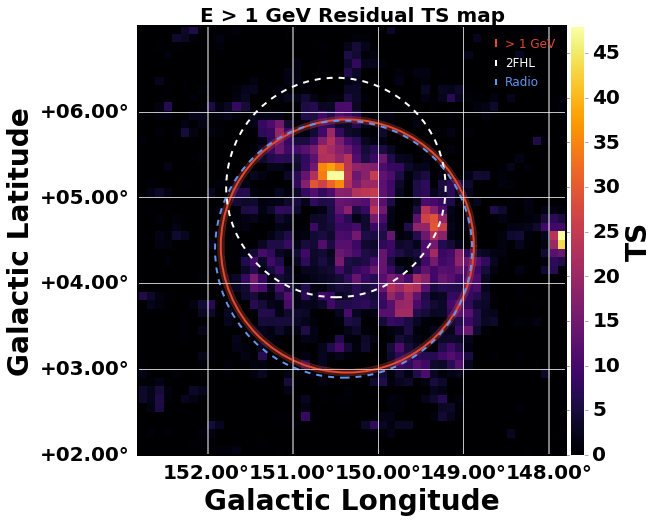

In [575]:
#same as above but showing the  >1 GeV, and radio extent?
#mapPath = os.path.join(g150Dir,'1gevTo563gev/Disk/G150.3+4.5_cmap.fits')
mapPath = os.path.join(g150Dir,'1gevTo563gev/Disk/Initial_fit_aftDelTSlt9_G150.3+4.5_tsmap.fits')
head = pf.getheader(mapPath)
g150_wcs = wcs.WCS(head)
binsz = head.get('CDELT2') #good for tsmaps, use b pixel size
ncolors = plt.rcParams['axes.prop_cycle'] #get colors from default color cycle
maps = 'Counts Maps'
maps = 'TS'
fig = plt.figure(figsize=[8,8])
f = aplpy.FITSFigure(mapPath,figure = fig,)
if maps == 'Counts Maps':
    f.show_colorscale(vmin = 0,pmax = 100,cmap = 'inferno', smooth = None) #do I need to playt with the pmin/max? values?
    cbarTitle = 'Counts'
else:
    f.show_colorscale(vmin = 0, vmax = 48,cmap = 'inferno', smooth = None,stretch = 'linear') #do I need to playt with the pmin/max? values?
    cbarTitle = 'TS'
#f.set_tick_color('white')
f.show_grid()
f.hide_grid()
#f.add_label(x = 150.4,y=3.3,text = 'G150.3+4.5',family = 'Helvetica', relative =False, weight = 2, size =28, color = 'cyan')
f.add_label
f.set_system_latex(usetex = False)
# f.set_tick_labels_style('latex')
# f.set_labels_latex(True)
f.tick_labels.set_xformat('ddd.dd')
f.tick_labels.set_yformat('ddd.dd')
ax = plt.gca()
ax.xaxis.label.set_color('k')
ax.yaxis.label.set_color('k')
[i.set_color("k") for i in plt.gca().get_xticklabels()]
[i.set_color("k") for i in plt.gca().get_yticklabels()]
cbar = plt.colorbar
f.frame.set_color('black')
f.frame.set_linewidth(2)
f.add_colorbar()
f.axis_labels.set_font(size='28',weight='bold')
f.tick_labels.set_font(size ='20',weight = 'bold')
f.colorbar.set_axis_label_text(cbarTitle)
###
c = f.image.colorbar
c.ax.yaxis.label.set_color('k')
[i.set_color("k") for i in c.ax.get_yticklabels()]
f.colorbar.set_font(size='20',weight = 'bold')
f.colorbar.set_axis_label_font(size='28',weight='bold')
f.recenter(150.3, 4.5, 2.5) #this is just for kookaburra for now
ind = 0
for s in [sigD[ind]]:
    ##get wcs pixel coords
    ringCrdPix = g150_wcs.wcs_world2pix([[lD[ind],bD[ind]]], 0).ravel()
    #print lD[ind],bD[ind]
    crdsFromPix = np.asarray([ringCrdPix])
    #np.array([[lpix, bpix]], np.float_)
    crds= g150_wcs.wcs_pix2world(crdsFromPix, 0).ravel()
    #print crds
    #print ringCrdPix
    ##try with bokek
    #glyph = Annulus(x=150.3, y=4.5, inner_radius=.2, outer_radius=.4, fill_color="#7fc97f")
    
    ##try with photutils
    ##did this not work because the radius needs to be pixel coords also?
    pixelMinR =  (sigD[ind] - sigDErr[ind])/ binsz
    pixelMaxR = (sigD[ind] + sigDErr[ind]) / binsz
    #lPix = lD[ind] * binsz # There are nothing?
    #bPix = bD[ind] * binsz # There are nothing?
    lerrPix = lerrD[ind] * binsz # are these really what I want?
    berrPix = berrD[ind] * binsz # are these really what I want?
    ring = pu.CircularAnnulus(tuple(ringCrdPix),pixelMinR ,pixelMaxR)
    circ = pu.CircularAperture(tuple(ringCrdPix),sigD[ind]/binsz)
    #ring = pu.CircularAnnulus((150.3,4.5),sigD[ind] - sigDErr[ind] ,sigD[ind] + sigDErr[ind])
    ##ring.plot(ax = ax,fill = True,alpha = 0.3,color = list(ncolors)[ind]['color'])
    #f.show_circles(lD[ind], bD[ind],sigD[ind], edgecolor = list(ncolors)[ind]['color'], lw = 2,linestyle = '-')
    circ.plot(ax = ax,color = list(ncolors)[ind]['color'],lw = 2,label = eRange[ind])
    #are the errorbars too small?
    #ax.plot(ringCrdPix[0],ringCrdPix[1],'x',color = list(ncolors)[ind]['color'],ms = 10)
    ##ax.errorbar(ringCrdPix[0],ringCrdPix[1],xerr=lerrPix,yerr=berrPix,ecolor = list(ncolors)[ind]['color'],ms = 4)
    #plt.show()
    ##break
    #try with mpl
    
    ###I need to think about why this isn't working
    ###something to do  with xs/ys having negative values
    ###it's not mapping to the right values, I need to use fractional radius and not just total
    n, radii = 50, [pixelMinR, pixelMaxR]
    theta = np.linspace(0, 2*np.pi, n, endpoint=True)
    xs = np.outer(radii, np.cos(theta))+ ringCrdPix[0]
    ys = np.outer(radii, np.sin(theta))+ ringCrdPix[1]
    xs[1,:] = xs[1,::-1]
    ys[1,:] = ys[1,::-1]
    ax.fill(np.ravel(xs), np.ravel(ys), edgecolor= list(ncolors)[ind]['color'], alpha = 0.3)
#add 2FHL circle
#this is from my galInd fix run I think
l2FHL =  150.390055 #150.384
b2FHL =  5.2196 #5.21
l2FHLerr = 0.0510 #RA error
b2FHLerr = 0.07334 # DEC error
s2FHL = 1.28068 #1.28068 #paper says 1.27
sErr2FHL = 0.0411
CrdPix2FHL = g150_wcs.wcs_world2pix([[l2FHL,b2FHL]], 0).ravel()
circ = pu.CircularAperture(tuple(CrdPix2FHL),s2FHL/binsz)
circ.plot(ax = ax,color = 'white',lw = 2,ls = '--',label = '2FHL')

#radio
#should I put an ellipse?
#circle for now
brad = 4.5
lrad = 150.3
srad = 1.5
CrdPixRad = g150_wcs.wcs_world2pix([[lrad,brad]], 0).ravel()
circ = pu.CircularAperture(tuple(CrdPixRad),srad/binsz)
circ.plot(ax = ax,color = 'cornflowerblue',lw = 2,ls = '--',label = 'Radio')

f.set_title('E > 1 GeV Residual TS map',size='20',weight = 'bold')
leg = ax.legend(fancybox=True, framealpha=0,handlelength=0)
for text in leg.get_texts():
    if '2FHL' in text.__str__(): #better way to get the string out?
        plt.setp(text, color = 'white')
    elif 'Radio' in text.__str__():
        plt.setp(text, color = 'cornflowerblue')
    else:
        plt.setp(text, color = list(ncolors)[ind]['color'])

f.save('/Users/elunejava/Desktop/G150_1GeV_resTsmap_radio_.png',dpi=300)

#still need to add postion crosses w/errorbars to show centroid

5


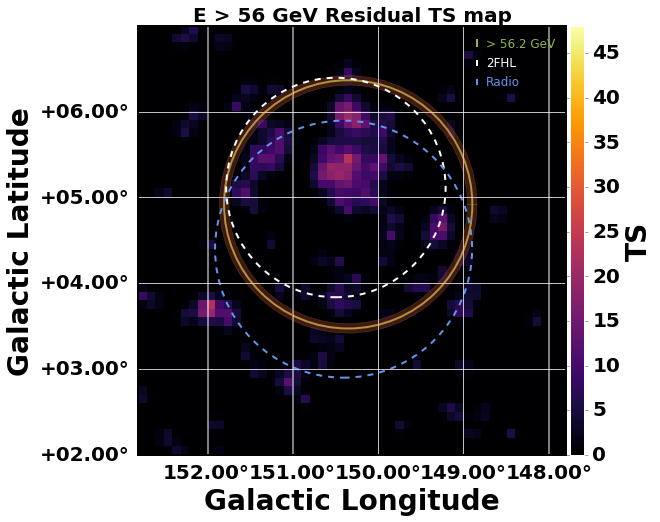

In [589]:
#> 56 GeV map
#same as above but showing the  >1 GeV, and radio extent?
#mapPath = os.path.join(g150Dir,'1gevTo563gev/Disk/G150.3+4.5_cmap.fits')
mapPath = os.path.join(g150Dir,'56p2gevTo563gev/Disk/Initial_fit_aftDelTSlt9_G150.3+4.5_tsmap.fits')
head = pf.getheader(mapPath)
g150_wcs = wcs.WCS(head)
binsz = head.get('CDELT2') #good for tsmaps, use b pixel size
ncolors = plt.rcParams['axes.prop_cycle'] #get colors from default color cycle
maps = 'Counts Maps'
maps = 'TS'
fig = plt.figure(figsize=[8,8])
f = aplpy.FITSFigure(mapPath,figure = fig,)
if maps == 'Counts Maps':
    f.show_colorscale(vmin = 0,pmax = 100,cmap = 'inferno', smooth = None) #do I need to playt with the pmin/max? values?
    cbarTitle = 'Counts'
else:
    f.show_colorscale(vmin = 0, vmax = 48,cmap = 'inferno', smooth = None,stretch = 'linear') #do I need to playt with the pmin/max? values?
    cbarTitle = 'TS'
#f.set_tick_color('white')
f.show_grid()
f.hide_grid()
#f.add_label(x = 150.4,y=3.3,text = 'G150.3+4.5',family = 'Helvetica', relative =False, weight = 2, size =28, color = 'cyan')
f.add_label
f.set_system_latex(usetex = False)
# f.set_tick_labels_style('latex')
# f.set_labels_latex(True)
f.tick_labels.set_xformat('ddd.dd')
f.tick_labels.set_yformat('ddd.dd')
ax = plt.gca()
ax.xaxis.label.set_color('k')
ax.yaxis.label.set_color('k')
[i.set_color("k") for i in plt.gca().get_xticklabels()]
[i.set_color("k") for i in plt.gca().get_yticklabels()]
cbar = plt.colorbar
f.frame.set_color('black')
f.frame.set_linewidth(2)
f.add_colorbar()
f.axis_labels.set_font(size='28',weight='bold')
f.tick_labels.set_font(size ='20',weight = 'bold')
f.colorbar.set_axis_label_text(cbarTitle)
###
c = f.image.colorbar
c.ax.yaxis.label.set_color('k')
[i.set_color("k") for i in c.ax.get_yticklabels()]
f.colorbar.set_font(size='20',weight = 'bold')
f.colorbar.set_axis_label_font(size='28',weight='bold')
f.recenter(150.3, 4.5, 2.5) #this is just for kookaburra for now
ind = 5
for s in [sigD[ind]]:
    ##get wcs pixel coords
    ringCrdPix = g150_wcs.wcs_world2pix([[lD[ind],bD[ind]]], 0).ravel()
    #print lD[ind],bD[ind]
    crdsFromPix = np.asarray([ringCrdPix])
    #np.array([[lpix, bpix]], np.float_)
    crds= g150_wcs.wcs_pix2world(crdsFromPix, 0).ravel()
    #print crds
    #print ringCrdPix
    ##try with bokek
    #glyph = Annulus(x=150.3, y=4.5, inner_radius=.2, outer_radius=.4, fill_color="#7fc97f")
    
    ##try with photutils
    ##did this not work because the radius needs to be pixel coords also?
    pixelMinR =  (sigD[ind] - sigDErr[ind])/ binsz
    pixelMaxR = (sigD[ind] + sigDErr[ind]) / binsz
    #lPix = lD[ind] * binsz # There are nothing?
    #bPix = bD[ind] * binsz # There are nothing?
    lerrPix = lerrD[ind] * binsz # are these really what I want?
    berrPix = berrD[ind] * binsz # are these really what I want?
    ring = pu.CircularAnnulus(tuple(ringCrdPix),pixelMinR ,pixelMaxR)
    circ = pu.CircularAperture(tuple(ringCrdPix),sigD[ind]/binsz)
    #ring = pu.CircularAnnulus((150.3,4.5),sigD[ind] - sigDErr[ind] ,sigD[ind] + sigDErr[ind])
    ##ring.plot(ax = ax,fill = True,alpha = 0.3,color = list(ncolors)[ind]['color'])
    #f.show_circles(lD[ind], bD[ind],sigD[ind], edgecolor = list(ncolors)[ind]['color'], lw = 2,linestyle = '-')
    circ.plot(ax = ax,color = list(ncolors)[ind]['color'],lw = 2,label = eRange[ind])
    #are the errorbars too small?
    #ax.plot(ringCrdPix[0],ringCrdPix[1],'x',color = list(ncolors)[ind]['color'],ms = 10)
    ##ax.errorbar(ringCrdPix[0],ringCrdPix[1],xerr=lerrPix,yerr=berrPix,ecolor = list(ncolors)[ind]['color'],ms = 4)
    #plt.show()
    ##break
    #try with mpl
    
    ###I need to think about why this isn't working
    ###something to do  with xs/ys having negative values
    ###it's not mapping to the right values, I need to use fractional radius and not just total
    n, radii = 50, [pixelMinR, pixelMaxR]
    theta = np.linspace(0, 2*np.pi, n, endpoint=True)
    xs = np.outer(radii, np.cos(theta))+ ringCrdPix[0]
    ys = np.outer(radii, np.sin(theta))+ ringCrdPix[1]
    xs[1,:] = xs[1,::-1]
    ys[1,:] = ys[1,::-1]
    ax.fill(np.ravel(xs), np.ravel(ys), edgecolor= list(ncolors)[ind]['color'], alpha = 0.3) #idk why this doesn't looked freen to me
#add 2FHL circle
#this is from my galInd fix run I think
l2FHL =  150.390055 #150.384
b2FHL =  5.2196 #5.21
l2FHLerr = 0.0510 #RA error
b2FHLerr = 0.07334 # DEC error
s2FHL = 1.28068 #1.28068 #paper says 1.27
sErr2FHL = 0.0411
CrdPix2FHL = g150_wcs.wcs_world2pix([[l2FHL,b2FHL]], 0).ravel()
circ = pu.CircularAperture(tuple(CrdPix2FHL),s2FHL/binsz)
circ.plot(ax = ax,color = 'white',lw = 2,ls = '--',label = '2FHL')

#radio
#should I put an ellipse?
#circle for now
brad = 4.5
lrad = 150.3
srad = 1.5
CrdPixRad = g150_wcs.wcs_world2pix([[lrad,brad]], 0).ravel()
circ = pu.CircularAperture(tuple(CrdPixRad),srad/binsz)
circ.plot(ax = ax,color = 'cornflowerblue',lw = 2,ls = '--',label = 'Radio')

f.set_title('E > 56 GeV Residual TS map',size='20',weight = 'bold')
leg = ax.legend(fancybox=True, framealpha=0,handlelength=0)
for text in leg.get_texts():
    if '2FHL' in text.__str__(): #better way to get the string out?
        plt.setp(text, color = 'white')
    elif 'Radio' in text.__str__():
        plt.setp(text, color = 'cornflowerblue')
    else:
        plt.setp(text, color = list(ncolors)[ind]['color'])

f.save('/Users/elunejava/Desktop/G150_56GeV_resTsmap_radio_.png',dpi=300)

#still need to add postion crosses w/errorbars to show centroid 

In [ ]:
# once more with the 2FHL map as background

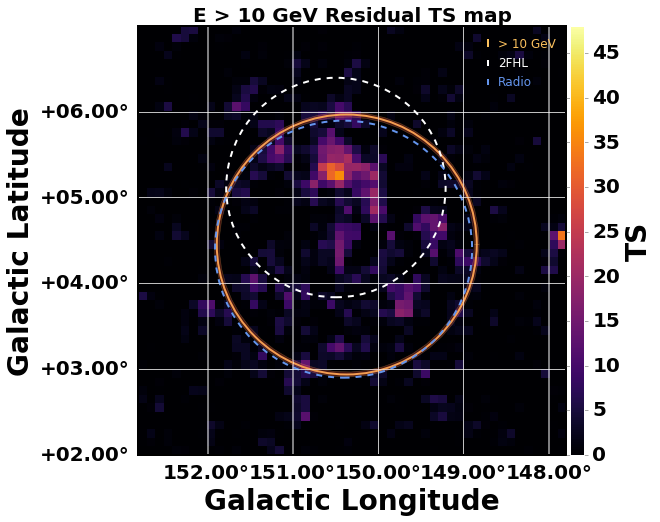

In [580]:
#finally with 10 gev as bkg 
#> 56 GeV map
#same as above but showing the  >1 GeV, and radio extent?
#mapPath = os.path.join(g150Dir,'1gevTo563gev/Disk/G150.3+4.5_cmap.fits')
mapPath = os.path.join(g150Dir,'10gevTo563gev/Disk/Initial_fit_aftDelTSlt9_G150.3+4.5_tsmap.fits')
head = pf.getheader(mapPath)
g150_wcs = wcs.WCS(head)
binsz = head.get('CDELT2') #good for tsmaps, use b pixel size
ncolors = plt.rcParams['axes.prop_cycle'] #get colors from default color cycle
maps = 'Counts Maps'
maps = 'TS'
fig = plt.figure(figsize=[8,8])
f = aplpy.FITSFigure(mapPath,figure = fig,)
if maps == 'Counts Maps':
    f.show_colorscale(vmin = 0,pmax = 100,cmap = 'inferno', smooth = None) #do I need to playt with the pmin/max? values?
    cbarTitle = 'Counts'
else:
    f.show_colorscale(vmin = 0, vmax = 48,cmap = 'inferno', smooth = None,stretch = 'linear') #do I need to playt with the pmin/max? values?
    cbarTitle = 'TS'
#f.set_tick_color('white')
f.show_grid()
f.hide_grid()
#f.add_label(x = 150.4,y=3.3,text = 'G150.3+4.5',family = 'Helvetica', relative =False, weight = 2, size =28, color = 'cyan')
f.add_label
f.set_system_latex(usetex = False)
# f.set_tick_labels_style('latex')
# f.set_labels_latex(True)
f.tick_labels.set_xformat('ddd.dd')
f.tick_labels.set_yformat('ddd.dd')
ax = plt.gca()
ax.xaxis.label.set_color('k')
ax.yaxis.label.set_color('k')
[i.set_color("k") for i in plt.gca().get_xticklabels()]
[i.set_color("k") for i in plt.gca().get_yticklabels()]
cbar = plt.colorbar
f.frame.set_color('black')
f.frame.set_linewidth(2)
f.add_colorbar()
f.axis_labels.set_font(size='28',weight='bold')
f.tick_labels.set_font(size ='20',weight = 'bold')
f.colorbar.set_axis_label_text(cbarTitle)
###
c = f.image.colorbar
c.ax.yaxis.label.set_color('k')
[i.set_color("k") for i in c.ax.get_yticklabels()]
f.colorbar.set_font(size='20',weight = 'bold')
f.colorbar.set_axis_label_font(size='28',weight='bold')
f.recenter(150.3, 4.5, 2.5) #this is just for kookaburra for now
ind = 4
for s in [sigD[ind]]:
    ##get wcs pixel coords
    ringCrdPix = g150_wcs.wcs_world2pix([[lD[ind],bD[ind]]], 0).ravel()
    #print lD[ind],bD[ind]
    crdsFromPix = np.asarray([ringCrdPix])
    #np.array([[lpix, bpix]], np.float_)
    crds= g150_wcs.wcs_pix2world(crdsFromPix, 0).ravel()
    #print crds
    #print ringCrdPix
    ##try with bokek
    #glyph = Annulus(x=150.3, y=4.5, inner_radius=.2, outer_radius=.4, fill_color="#7fc97f")
    
    ##try with photutils
    ##did this not work because the radius needs to be pixel coords also?
    pixelMinR =  (sigD[ind] - sigDErr[ind])/ binsz
    pixelMaxR = (sigD[ind] + sigDErr[ind]) / binsz
    #lPix = lD[ind] * binsz # There are nothing?
    #bPix = bD[ind] * binsz # There are nothing?
    lerrPix = lerrD[ind] * binsz # are these really what I want?
    berrPix = berrD[ind] * binsz # are these really what I want?
    ring = pu.CircularAnnulus(tuple(ringCrdPix),pixelMinR ,pixelMaxR)
    circ = pu.CircularAperture(tuple(ringCrdPix),sigD[ind]/binsz)
    #ring = pu.CircularAnnulus((150.3,4.5),sigD[ind] - sigDErr[ind] ,sigD[ind] + sigDErr[ind])
    ##ring.plot(ax = ax,fill = True,alpha = 0.3,color = list(ncolors)[ind]['color'])
    #f.show_circles(lD[ind], bD[ind],sigD[ind], edgecolor = list(ncolors)[ind]['color'], lw = 2,linestyle = '-')
    circ.plot(ax = ax,color = list(ncolors)[ind]['color'],lw = 2,label = eRange[ind])
    #are the errorbars too small?
    #ax.plot(ringCrdPix[0],ringCrdPix[1],'x',color = list(ncolors)[ind]['color'],ms = 10)
    ##ax.errorbar(ringCrdPix[0],ringCrdPix[1],xerr=lerrPix,yerr=berrPix,ecolor = list(ncolors)[ind]['color'],ms = 4)
    #plt.show()
    ##break
    #try with mpl
    
    ###I need to think about why this isn't working
    ###something to do  with xs/ys having negative values
    ###it's not mapping to the right values, I need to use fractional radius and not just total
    n, radii = 50, [pixelMinR, pixelMaxR]
    theta = np.linspace(0, 2*np.pi, n, endpoint=True)
    xs = np.outer(radii, np.cos(theta))+ ringCrdPix[0]
    ys = np.outer(radii, np.sin(theta))+ ringCrdPix[1]
    xs[1,:] = xs[1,::-1]
    ys[1,:] = ys[1,::-1]
    ax.fill(np.ravel(xs), np.ravel(ys), edgecolor= list(ncolors)[ind]['color'], alpha = 0.3)
#add 2FHL circle
#this is from my galInd fix run I think
l2FHL =  150.390055 #150.384
b2FHL =  5.2196 #5.21
l2FHLerr = 0.0510 #RA error
b2FHLerr = 0.07334 # DEC error
s2FHL = 1.28068 #1.28068 #paper says 1.27
sErr2FHL = 0.0411
CrdPix2FHL = g150_wcs.wcs_world2pix([[l2FHL,b2FHL]], 0).ravel()
circ = pu.CircularAperture(tuple(CrdPix2FHL),s2FHL/binsz)
circ.plot(ax = ax,color = 'white',lw = 2,ls = '--',label = '2FHL')

#radio
#should I put an ellipse?
#circle for now
brad = 4.5
lrad = 150.3
srad = 1.5
CrdPixRad = g150_wcs.wcs_world2pix([[lrad,brad]], 0).ravel()
circ = pu.CircularAperture(tuple(CrdPixRad),srad/binsz)
circ.plot(ax = ax,color = 'cornflowerblue',lw = 2,ls = '--',label = 'Radio')

f.set_title('E > 10 GeV Residual TS map',size='20',weight = 'bold')
leg = ax.legend(fancybox=True, framealpha=0,handlelength=0)
for text in leg.get_texts():
    if '2FHL' in text.__str__(): #better way to get the string out?
        plt.setp(text, color = 'white')
    elif 'Radio' in text.__str__():
        plt.setp(text, color = 'cornflowerblue')
    else:
        plt.setp(text, color = list(ncolors)[ind]['color'])

f.save('/Users/elunejava/Desktop/G150_10GeV_resTsmap_radio_.png',dpi=300)

#still need to add postion crosses w/errorbars to show centroid 

# P8R2_SOURCE_V6 PSF for reference

## PSF3

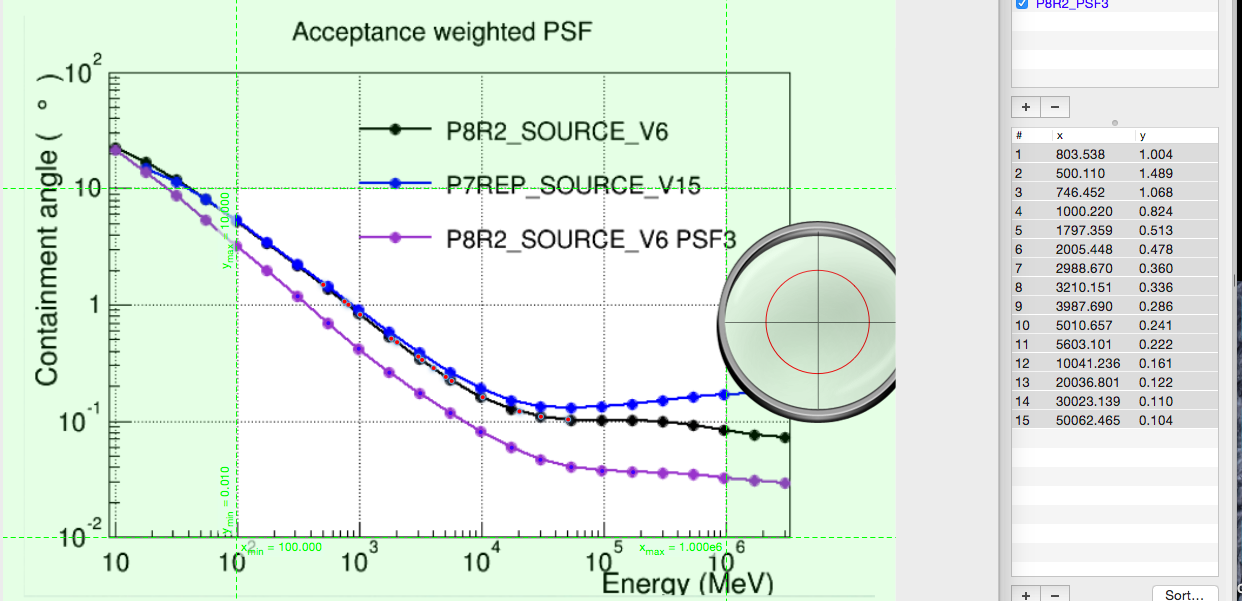

In [315]:
Image(filename='/Users/elunejava/Desktop/P8R2_SOURCEV6_All.png')

# PSF 3

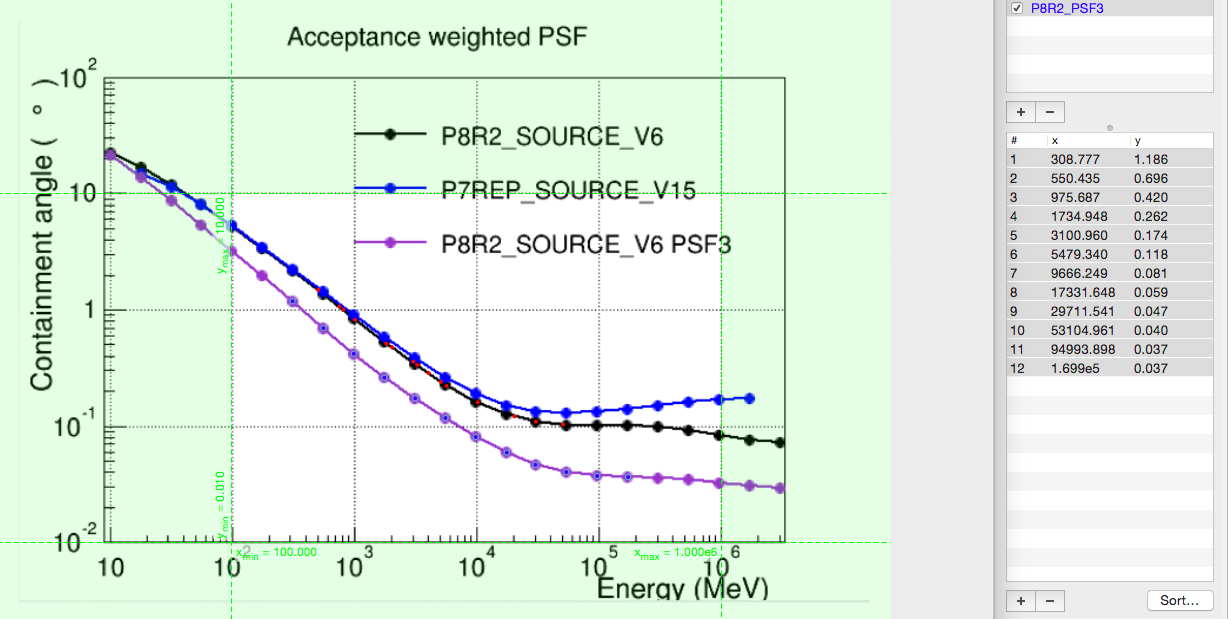

In [313]:
Image(filename='/Users/elunejava/Desktop/P8R2_SOURCEV6_PSF3.png')

# SNR SED comparison

In [548]:
#get SED data
g150sedDir = '/Users/elunejava/Dropbox/CurrentWork/G150/pointlikeSED/'
g150_1gev  = os.path.join(g150sedDir,'G150_1gev_xgev_yerg_SED.txt') #UNITS: erg/ eV
g150_1gevTab = Table.read(g150_1gev, format = 'ascii')
g150_1gevTab['x'] = g150_1gevTab['x'] / 1.e3
#if I need to convert from MeV flux to erg flux 
#g150_1gevTab['y'] = g150_1gevTab['y'] * 1.60217657*1e-6

#G150 2FHL
fhl2sed = os.path.join(g150sedDir,'2FHL_J0431p2+5553e.txt')
fhl2Tab = Table.read(fhl2sed, format = 'ascii')

###W44
w44Dir = '/Users/elunejava//Dropbox/CurrentWork/SNR_MC/W28_W44_HB3_SED/sed/W44'
w44_latUL = os.path.join(w44Dir,'W44_LAT_pion_ULs.txt') #UNITS: erg/ eV
w44_lat = os.path.join(w44Dir,'W44_LAT_pion.txt') #UNITS: erg/ eV
w44_latULTab = Table.read(w44_latUL, format = 'ascii')
w44_latTab = Table.read(w44_lat, format = 'ascii')
w44_latULTab['x'] = w44_latULTab['x'] / 1.e9
w44_latTab['x'] = w44_latTab['x'] / 1.e9
ul_fraction = 0.4

#other remnants
othRemDir = '/Users/elunejava/Desktop/gamCygGeVTeV/'
rxj = Table.read(os.path.join(othRemDir,'rxjSED_mev_intFlxMeV.txt'),format = 'ascii')#x:MeV, y: Mev/cm^2/s
w49 = Table.read(os.path.join(othRemDir,'w49b_MeV_intFlxerg.txt'),format = 'ascii')#x:MeV, y: Mev/cm^2/s
vel = Table.read(os.path.join(othRemDir,'velaJr_log10ev_intFlxerg.txt'),format = 'ascii')#x:log(ev, y: erg/cm^2/s
pup = Table.read(os.path.join(othRemDir,'puppisA_mev_intFlxErg.txt'),format = 'ascii')#x:MeV, y: erg/cm^2/s
ic4 = Table.read(os.path.join(othRemDir,'ic443_mev_intFlxMeV.txt'),format = 'ascii')#x:eV, y: erg/cm^2/s
ctb37 = Table.read(os.path.join(othRemDir,'ctb37a_MeV_intFlxErg.txt'),format = 'ascii')#x:MeV, y: erg/cm^2/s
c391 = Table.read(os.path.join(othRemDir,'3c391_MeV_intFlxMeV.txt'),format = 'ascii')#x:MeV, y: erg/cm^2/s
g349 = Table.read(os.path.join(othRemDir,'g349_MeV_intFlxErg.txt'),format = 'ascii')#x:MeV, y: erg/cm^2/s
ctb109 = Table.read(os.path.join(othRemDir,'ctb109_mev_intFlxErg.txt'),format = 'ascii')#x:MeV, y: erg/cm^2/s

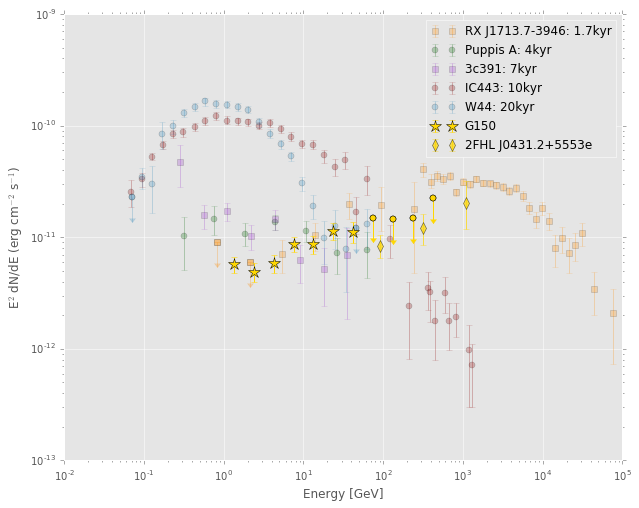

In [552]:
#plot SED
#use np.asarray to not use the y label from astropy
#instead maybe change y col name to what I want the label to be
plt.figure(figsize=[10,8])
ncolors = plt.rcParams['axes.prop_cycle'] #get colors from default color cycle

###W28
#maybe not, which source?
####
#RX J1713 
plt.errorbar(rxj['x']/1e3,np.asarray(rxj['y']/624150.974), yerr = [-rxj['dy-']/624150.974,rxj['dy+']/624150.974]  ,color = 'DarkOrange', marker = 's' ,ls ='none', label = 'RX J1713.7-3946: 1.7kyr', alpha = 0.25)
ind = np.where(rxj['dy-'] ==0) #make upper limit arrows if there's no dy- error (assuming there's no dy+ then) #make upper limit arrows if there's no dy- error (assuming there's no dy+ then) 
plt.errorbar(rxj['x'][ind]/1e3, np.asarray(rxj['y'][ind]/624150.974) , yerr = [ul_fraction*rxj['y'][ind]/624150.974,np.zeros_like(rxj['y'][ind], dtype=float)] ,color = 'DarkOrange', marker = 's',ls ='none', capsize = 0, alpha = 0.25)
plt.plot(rxj['x'][ind]/1e3, (1-ul_fraction)*np.asarray(rxj['y'][ind]/624150.974) ,marker =mlines.CARETDOWN,ls = 'none',color ='DarkOrange', alpha = 0.25)

# #W49 B 
# plt.errorbar(w49['x'],w49['y']* 624150.974, yerr = [-w49['dy-']* 624150.974,w49['dy+']* 624150.974]  ,color = 'DarkSalmon', marker = 's' ,ls ='none', label = 'W49B: 2kyr', alpha = 0.25)
# ind = np.where(w49['dy-'] ==0) #make upper limit arrows if there's no dy- error (assuming there's no dy+ then) #make upper limit arrows if there's no dy- error (assuming there's no dy+ then) 
# plt.errorbar(w49['x'][ind], w49['y'][ind]* 624150.974 , yerr = [ul_fraction*w49['y'][ind]* 624150.974,np.zeros_like(w49['y'][ind], dtype=float)] ,color = 'DarkSalmon', marker = 's',ls ='none', capsize = 0, alpha = 0.25)
# plt.plot(w49['x'][ind], (1-ul_fraction)*w49['y'][ind]* 624150.974 ,marker =mlines.CARETDOWN,ls = 'none',color ='DarkSalmon', alpha = 0.25)

# #Vela Jr
#plt.errorbar(10**vel['x']/1.e9,np.asarray(vel['y']), yerr = [-vel['dy-'],vel['dy+']]  ,color = 'DarkCyan', marker = 's', ls ='none',label = 'Vela Jr.: 3kyr', alpha = 0.25)

# #puppis A
plt.errorbar(pup['x']/1e3, np.asarray(pup['y']), yerr = [-pup['dy-'],pup['dy+']]  ,color = 'DarkGreen', marker = 'o' ,ls ='none', label = 'Puppis A: 4kyr', alpha = 0.25)

# #3c391
plt.errorbar(c391['x']/1e3,np.asarray(c391['y']), yerr = [-c391['dy-'],c391['dy+']]  ,color = 'DarkOrchid', marker = 's' ,ls ='none', label = '3c391: 7kyr', alpha = 0.25)

# #IC443
plt.errorbar(ic4['x']/1e9, np.asarray(ic4['y']), yerr = [-ic4['dy-'],ic4['dy+']]  ,color = 'DarkRed', marker = 'o', ls ='none', label = 'IC443: 10kyr', alpha = 0.25)

# #ctb37a
# plt.errorbar(ctb37['x'],ctb37['y']* 624150.974, yerr = [-ctb37['dy-']* 624150.974,ctb37['dy+']* 624150.974]  ,color = 'DarkTurquoise', marker = 's' ,ls ='none', label = 'CTB 37A: 5kyr', alpha = 0.25)

# #G349.7+0.2
# plt.errorbar(g349['x'],g349['y']* 624150.974, yerr = [-g349['dy-']* 624150.974,g349['dy+']* 624150.974]  ,color = 'DarkRed', marker = 's' ,ls ='none', label = 'G340.7+0.2: 10kyr', alpha = 0.25)

# #CTB109
# plt.errorbar(ctb109['x'],ctb109['y']* 624150.974, yerr = [-ctb109['dy-']* 624150.974,ctb109['dy+']* 624150.974]  ,color = 'DarkGoldenRod', marker = 's',ls ='none', label = 'CTB 109: 11kyr', alpha = 0.25)
# ind = np.where(ctb109['dy-'] ==0)
# plt.errorbar(ctb109['x'][ind], ctb109['y'][ind]* 624150.974 , yerr = [ul_fraction*ctb109['y'][ind]* 624150.974,np.zeros_like(ctb109['y'][ind], dtype=float)] ,color = 'DarkGoldenRod', marker = 's' , ls ='none' , capsize = 0, alpha = 0.25)
# plt.plot(ctb109['x'][ind], (1-ul_fraction)*ctb109['y'][ind]* 624150.974 ,marker =mlines.CARETDOWN,ls = 'none',color ='DarkGoldenRod', alpha = 0.25)

###W44
plt.errorbar(w44_latTab['x'],np.asarray(w44_latTab['y']), yerr = [-w44_latTab['dy-'],w44_latTab['dy+']] ,color = list(ncolors)[1]['color'], marker = 'o' , ls ='none',label = 'W44: 20kyr',alpha = 0.25)
plt.errorbar(w44_latULTab['x'], np.asarray(w44_latULTab['y']), yerr = [ul_fraction*w44_latULTab['y'],np.zeros_like(w44_latULTab['y'], dtype=float)] ,color = list(ncolors)[1]['color'], marker ='o',ls ='none', capsize = 0,alpha = 0.25)
plt.errorbar(w44_latULTab['x'], np.asarray(w44_latULTab['y']),color = list(ncolors)[1]['color'], marker ='o',ls = 'none',alpha = 0.25)
plt.plot(w44_latULTab['x'], (1-ul_fraction)*np.asarray(w44_latULTab['y']) ,marker =mlines.CARETDOWN,ls = 'none',color = list(ncolors)[1]['color'],alpha = 0.25)

###G150 1 GeV:
ulInd = np.min(np.where(g150_1gevTab['y'] == 0)) #get the index of the first energy that's an UL
g150_1gevTab[:ulInd] #only plot non-UL for now
#plt.errorbar(g150_1gevTab[:ulInd]['x'],np.asarray(g150_1gevTab[:ulInd]['y']), yerr = [g150_1gevTab[:ulInd]['y']-g150_1gevTab[:ulInd]['yerrLo'],(g150_1gevTab[:ulInd]['yerrHi']-g150_1gevTab[:ulInd]['y'])] ,color = list(ncolors)[0]['color'], marker = 'o' , ls ='none',label = 'G150: > 1 GeV')
plt.errorbar(g150_1gevTab[:ulInd]['x'],np.asarray(g150_1gevTab[:ulInd]['y']), yerr = [g150_1gevTab[:ulInd]['y']-g150_1gevTab[:ulInd]['yerrLo'],(g150_1gevTab[:ulInd]['yerrHi']-g150_1gevTab[:ulInd]['y'])] ,color = 'gold', marker = '*' , ls ='none',label = 'G150',ms = 12)
#UL
plt.errorbar(g150_1gevTab['x'][ulInd:], np.asarray(g150_1gevTab[ulInd:]['yerrHi']) , yerr = [ul_fraction*g150_1gevTab[ulInd:]['yerrHi'],np.zeros_like(g150_1gevTab[ulInd:]['yerrHi'], dtype=float)] ,color = 'gold', marker ='o',ls ='none', capsize = 0,label = None)
plt.errorbar(g150_1gevTab['x'][ulInd:], np.asarray(g150_1gevTab[ulInd:]['yerrHi']) ,color = 'gold', marker ='o',ls = 'none',label = None)
plt.plot(g150_1gevTab['x'][ulInd:], (1-ul_fraction)*np.asarray(g150_1gevTab[ulInd:]['yerrHi']) ,marker =mlines.CARETDOWN,ls = 'none',color = 'gold',label = None)

###G150 2FHL
plt.errorbar(fhl2Tab['x'],np.asarray(fhl2Tab['y']), yerr = [-fhl2Tab['dy-'],fhl2Tab['dy+']] ,color = 'gold', marker = 'd' , ls ='none',label = '2FHL J0431.2+5553e',alpha = 0.7,ms = 8)

plt.legend(loc= 'best')
plt.loglog()
plt.xlabel('Energy [GeV]')
plt.ylabel('E$^{2}$ dN/dE (erg cm$^{-2}$ s$^{-1}$)')
#plt.title('G150 vs. other LAT SNRs')

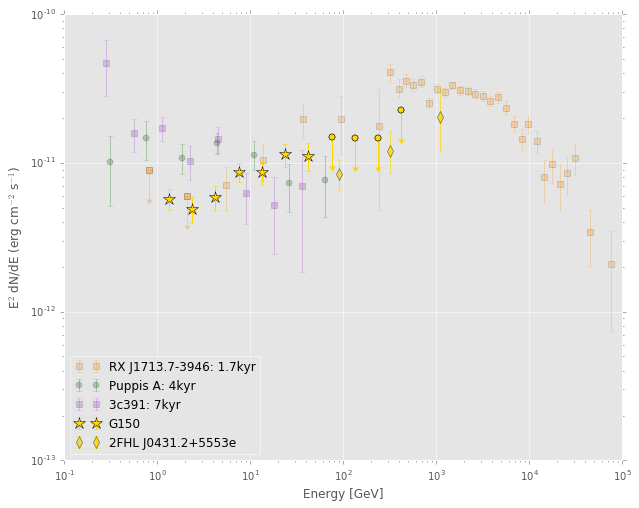

In [553]:
#same but getting rid of the old?
#should I make one that just gas RXJ1713?
#plot SED
#use np.asarray to not use the y label from astropy
#instead maybe change y col name to what I want the label to be
plt.figure(figsize=[10,8])
ncolors = plt.rcParams['axes.prop_cycle'] #get colors from default color cycle

###W28
#maybe not, which source?
####
#RX J1713 
plt.errorbar(rxj['x']/1e3,np.asarray(rxj['y']/624150.974), yerr = [-rxj['dy-']/624150.974,rxj['dy+']/624150.974]  ,color = 'DarkOrange', marker = 's' ,ls ='none', label = 'RX J1713.7-3946: 1.7kyr', alpha = 0.25)
ind = np.where(rxj['dy-'] ==0) #make upper limit arrows if there's no dy- error (assuming there's no dy+ then) #make upper limit arrows if there's no dy- error (assuming there's no dy+ then) 
plt.errorbar(rxj['x'][ind]/1e3, np.asarray(rxj['y'][ind]/624150.974) , yerr = [ul_fraction*rxj['y'][ind]/624150.974,np.zeros_like(rxj['y'][ind], dtype=float)] ,color = 'DarkOrange', marker = 's',ls ='none', capsize = 0, alpha = 0.25)
plt.plot(rxj['x'][ind]/1e3, (1-ul_fraction)*np.asarray(rxj['y'][ind]/624150.974) ,marker =mlines.CARETDOWN,ls = 'none',color ='DarkOrange', alpha = 0.25)

# #W49 B 
# plt.errorbar(w49['x'],w49['y']* 624150.974, yerr = [-w49['dy-']* 624150.974,w49['dy+']* 624150.974]  ,color = 'DarkSalmon', marker = 's' ,ls ='none', label = 'W49B: 2kyr', alpha = 0.25)
# ind = np.where(w49['dy-'] ==0) #make upper limit arrows if there's no dy- error (assuming there's no dy+ then) #make upper limit arrows if there's no dy- error (assuming there's no dy+ then) 
# plt.errorbar(w49['x'][ind], w49['y'][ind]* 624150.974 , yerr = [ul_fraction*w49['y'][ind]* 624150.974,np.zeros_like(w49['y'][ind], dtype=float)] ,color = 'DarkSalmon', marker = 's',ls ='none', capsize = 0, alpha = 0.25)
# plt.plot(w49['x'][ind], (1-ul_fraction)*w49['y'][ind]* 624150.974 ,marker =mlines.CARETDOWN,ls = 'none',color ='DarkSalmon', alpha = 0.25)

# #Vela Jr
#plt.errorbar(10**vel['x']/1.e9,np.asarray(vel['y']), yerr = [-vel['dy-'],vel['dy+']]  ,color = 'DarkCyan', marker = 's', ls ='none',label = 'Vela Jr.: 3kyr', alpha = 0.25)

# #puppis A
plt.errorbar(pup['x']/1e3, np.asarray(pup['y']), yerr = [-pup['dy-'],pup['dy+']]  ,color = 'DarkGreen', marker = 'o' ,ls ='none', label = 'Puppis A: 4kyr', alpha = 0.25)

# #3c391
plt.errorbar(c391['x']/1e3,np.asarray(c391['y']), yerr = [-c391['dy-'],c391['dy+']]  ,color = 'DarkOrchid', marker = 's' ,ls ='none', label = '3c391: 7kyr', alpha = 0.25)

###G150 1 GeV:
ulInd = np.min(np.where(g150_1gevTab['y'] == 0)) #get the index of the first energy that's an UL
g150_1gevTab[:ulInd] #only plot non-UL for now
#plt.errorbar(g150_1gevTab[:ulInd]['x'],np.asarray(g150_1gevTab[:ulInd]['y']), yerr = [g150_1gevTab[:ulInd]['y']-g150_1gevTab[:ulInd]['yerrLo'],(g150_1gevTab[:ulInd]['yerrHi']-g150_1gevTab[:ulInd]['y'])] ,color = list(ncolors)[0]['color'], marker = 'o' , ls ='none',label = 'G150: > 1 GeV')
plt.errorbar(g150_1gevTab[:ulInd]['x'],np.asarray(g150_1gevTab[:ulInd]['y']), yerr = [g150_1gevTab[:ulInd]['y']-g150_1gevTab[:ulInd]['yerrLo'],(g150_1gevTab[:ulInd]['yerrHi']-g150_1gevTab[:ulInd]['y'])] ,color = 'gold', marker = '*' , ls ='none',label = 'G150',ms = 12)
#UL
plt.errorbar(g150_1gevTab['x'][ulInd:], np.asarray(g150_1gevTab[ulInd:]['yerrHi']) , yerr = [ul_fraction*g150_1gevTab[ulInd:]['yerrHi'],np.zeros_like(g150_1gevTab[ulInd:]['yerrHi'], dtype=float)] ,color = 'gold', marker ='o',ls ='none', capsize = 0,label = None)
plt.errorbar(g150_1gevTab['x'][ulInd:], np.asarray(g150_1gevTab[ulInd:]['yerrHi']) ,color = 'gold', marker ='o',ls = 'none',label = None)
plt.plot(g150_1gevTab['x'][ulInd:], (1-ul_fraction)*np.asarray(g150_1gevTab[ulInd:]['yerrHi']) ,marker =mlines.CARETDOWN,ls = 'none',color = 'gold',label = None)

###G150 2FHL
plt.errorbar(fhl2Tab['x'],np.asarray(fhl2Tab['y']), yerr = [-fhl2Tab['dy-'],fhl2Tab['dy+']] ,color = 'gold', marker = 'd' , ls ='none',label = '2FHL J0431.2+5553e',alpha = 0.7,ms = 8)

plt.legend(loc= 'best')
plt.loglog()
plt.xlabel('Energy [GeV]')
plt.ylabel('E$^{2}$ dN/dE (erg cm$^{-2}$ s$^{-1}$)')
#plt.title('G150 vs. other LAT SNRs')

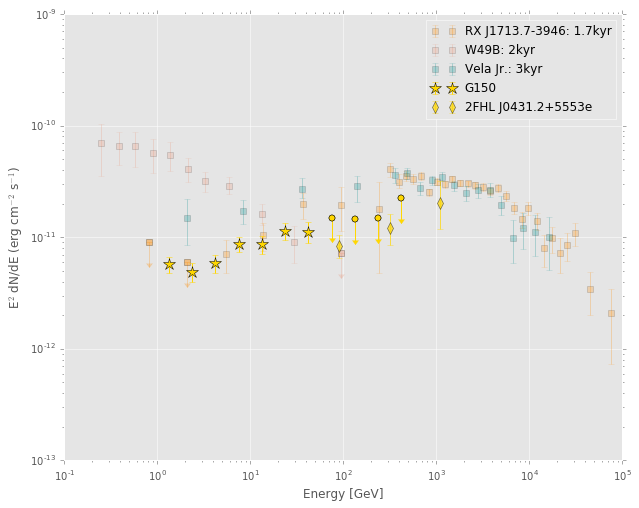

In [558]:
#same but getting rid of the old?
#should I make one that just gas RXJ1713?
#plot SED
#use np.asarray to not use the y label from astropy
#instead maybe change y col name to what I want the label to be
plt.figure(figsize=[10,8])
ncolors = plt.rcParams['axes.prop_cycle'] #get colors from default color cycle

###W28
#maybe not, which source?
####
#RX J1713 
plt.errorbar(rxj['x']/1e3,np.asarray(rxj['y']/624150.974), yerr = [-rxj['dy-']/624150.974,rxj['dy+']/624150.974]  ,color = 'DarkOrange', marker = 's' ,ls ='none', label = 'RX J1713.7-3946: 1.7kyr', alpha = 0.25)
ind = np.where(rxj['dy-'] ==0) #make upper limit arrows if there's no dy- error (assuming there's no dy+ then) #make upper limit arrows if there's no dy- error (assuming there's no dy+ then) 
plt.errorbar(rxj['x'][ind]/1e3, np.asarray(rxj['y'][ind]/624150.974) , yerr = [ul_fraction*rxj['y'][ind]/624150.974,np.zeros_like(rxj['y'][ind], dtype=float)] ,color = 'DarkOrange', marker = 's',ls ='none', capsize = 0, alpha = 0.25)
plt.plot(rxj['x'][ind]/1e3, (1-ul_fraction)*np.asarray(rxj['y'][ind]/624150.974) ,marker =mlines.CARETDOWN,ls = 'none',color ='DarkOrange', alpha = 0.25)

# #W49 B 
plt.errorbar(w49['x']/1e3,np.asarray(w49['y']), yerr = [-w49['dy-'],w49['dy+']]  ,color = 'DarkSalmon', marker = 's' ,ls ='none', label = 'W49B: 2kyr', alpha = 0.25)
ind = np.where(w49['dy-'] ==0) #make upper limit arrows if there's no dy- error (assuming there's no dy+ then) #make upper limit arrows if there's no dy- error (assuming there's no dy+ then) 
plt.errorbar(w49['x'][ind]/1e3,np.asarray( w49['y'][ind]) , yerr = [ul_fraction*w49['y'][ind],np.zeros_like(w49['y'][ind], dtype=float)] ,color = 'DarkSalmon', marker = 's',ls ='none', capsize = 0, alpha = 0.25)
plt.plot(w49['x'][ind]/1e3, (1-ul_fraction)*np.asarray(w49['y'][ind]) ,marker =mlines.CARETDOWN,ls = 'none',color ='DarkSalmon', alpha = 0.25)

# #Vela Jr
plt.errorbar(10**vel['x']/1.e9,np.asarray(vel['y']), yerr = [-vel['dy-'],vel['dy+']]  ,color = 'DarkCyan', marker = 's', ls ='none',label = 'Vela Jr.: 3kyr', alpha = 0.25)

###G150 1 GeV:
ulInd = np.min(np.where(g150_1gevTab['y'] == 0)) #get the index of the first energy that's an UL
g150_1gevTab[:ulInd] #only plot non-UL for now
#plt.errorbar(g150_1gevTab[:ulInd]['x'],np.asarray(g150_1gevTab[:ulInd]['y']), yerr = [g150_1gevTab[:ulInd]['y']-g150_1gevTab[:ulInd]['yerrLo'],(g150_1gevTab[:ulInd]['yerrHi']-g150_1gevTab[:ulInd]['y'])] ,color = list(ncolors)[0]['color'], marker = 'o' , ls ='none',label = 'G150: > 1 GeV')
plt.errorbar(g150_1gevTab[:ulInd]['x'],np.asarray(g150_1gevTab[:ulInd]['y']), yerr = [g150_1gevTab[:ulInd]['y']-g150_1gevTab[:ulInd]['yerrLo'],(g150_1gevTab[:ulInd]['yerrHi']-g150_1gevTab[:ulInd]['y'])] ,color = 'gold', marker = '*' , ls ='none',label = 'G150',ms = 12)
#UL
plt.errorbar(g150_1gevTab['x'][ulInd:], np.asarray(g150_1gevTab[ulInd:]['yerrHi']) , yerr = [ul_fraction*g150_1gevTab[ulInd:]['yerrHi'],np.zeros_like(g150_1gevTab[ulInd:]['yerrHi'], dtype=float)] ,color = 'gold', marker ='o',ls ='none', capsize = 0,label = None)
plt.errorbar(g150_1gevTab['x'][ulInd:], np.asarray(g150_1gevTab[ulInd:]['yerrHi']) ,color = 'gold', marker ='o',ls = 'none',label = None)
plt.plot(g150_1gevTab['x'][ulInd:], (1-ul_fraction)*np.asarray(g150_1gevTab[ulInd:]['yerrHi']) ,marker =mlines.CARETDOWN,ls = 'none',color = 'gold',label = None)

###G150 2FHL
plt.errorbar(fhl2Tab['x'],np.asarray(fhl2Tab['y']), yerr = [-fhl2Tab['dy-'],fhl2Tab['dy+']] ,color = 'gold', marker = 'd' , ls ='none',label = '2FHL J0431.2+5553e',alpha = 0.7,ms = 8)

plt.legend(loc= 'best')
plt.loglog()
plt.xlabel('Energy [GeV]')
plt.ylabel('E$^{2}$ dN/dE (erg cm$^{-2}$ s$^{-1}$)')
#plt.title('G150 vs. other LAT SNRs')